In [1]:
library('astsa')
library(forecast)

options(repr.plot.width=14, repr.plot.height=6)


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




In [2]:
setwd('./')
#ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_resampled.csv")
ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_no_weekends_resampled.csv")

In [3]:
ts_df <- ts_df[,2]

x = ts(ts_df, start=0 , frequency=1)


In [4]:
x = x/300000 # paso la unidad a slots

In [5]:
ts_df = ts_df/300000 # paso la unidad a slots

In [6]:
ts_df = ts(ts_df, start=0, frequency=1)

In [7]:
length(ts_df)

[1] 6048

In [8]:
start_test = 5184

ts_length = length(ts_df)

ts_length

ts_df_train = ts(ts_df[1:start_test-1], start=0, frequency=1)
ts_df_test = ts(ts_df[start_test:ts_length], start=start_test, frequency=1)

[1] 6048

In [9]:
dn = ts_df_train
dnt = ts_df_test

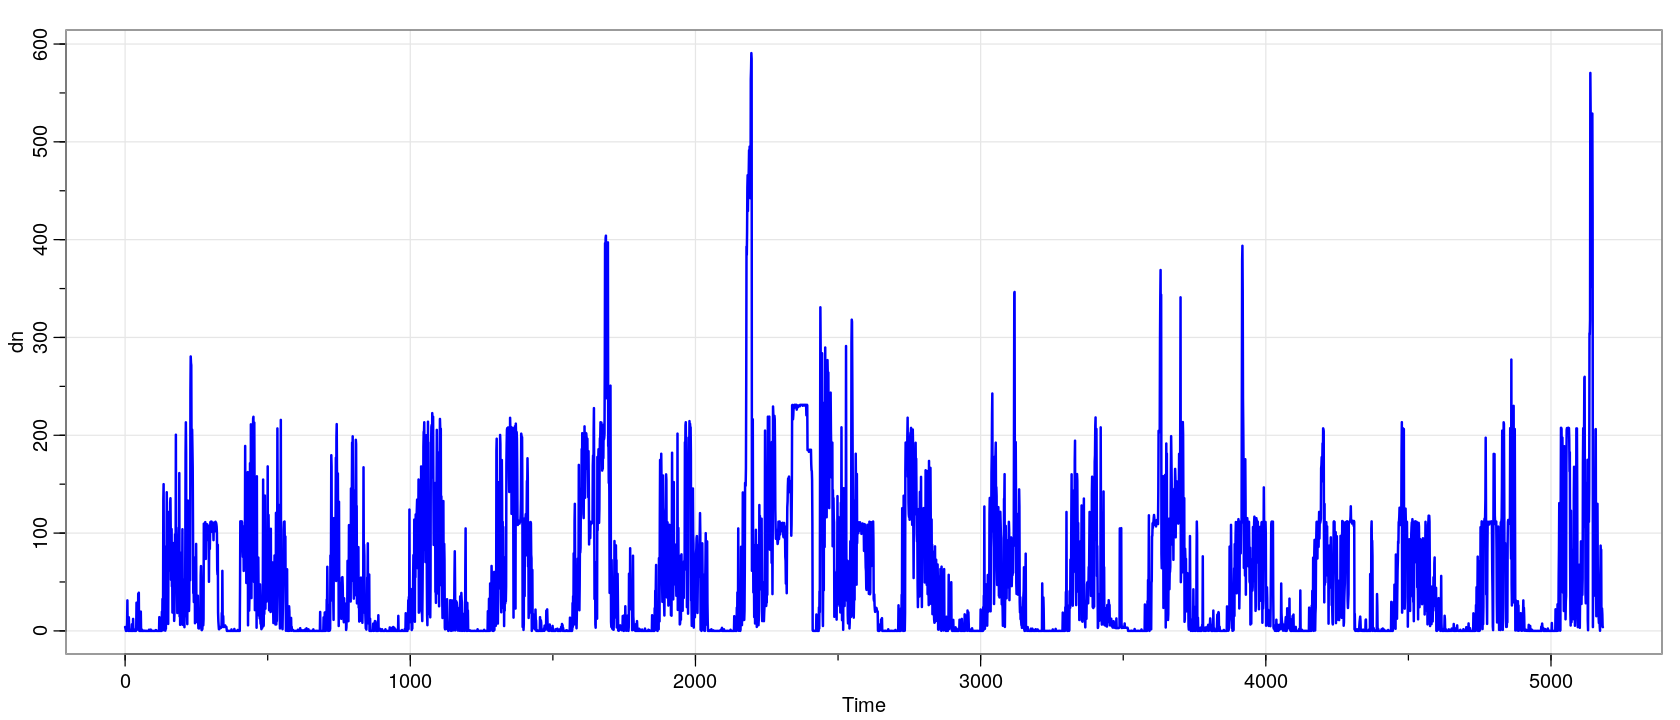

[1] 5183

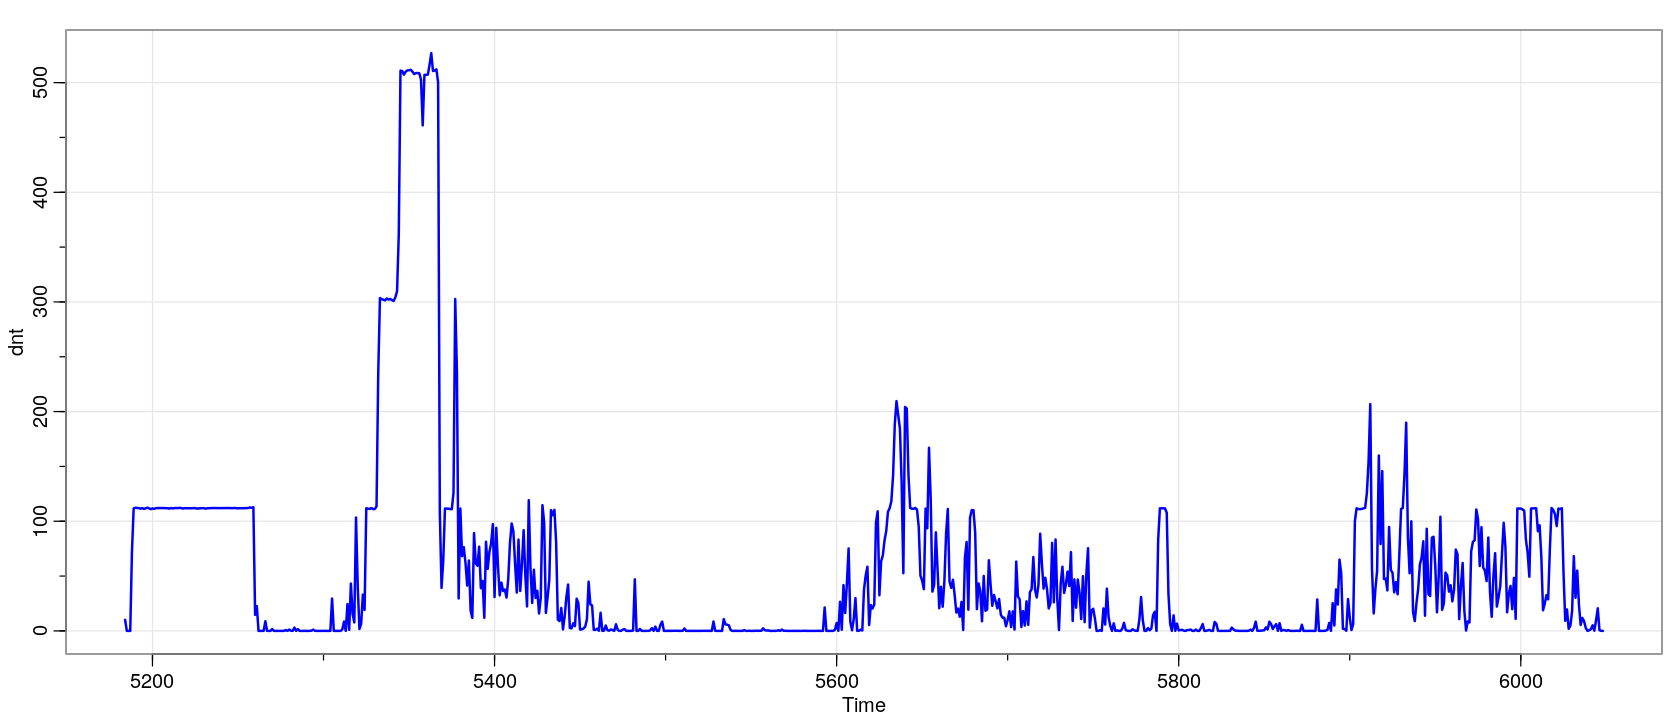

In [10]:
tsplot(dn, col=4, lwd=2)
tsplot(dnt, col=4, lwd=2)

length(time(dn))

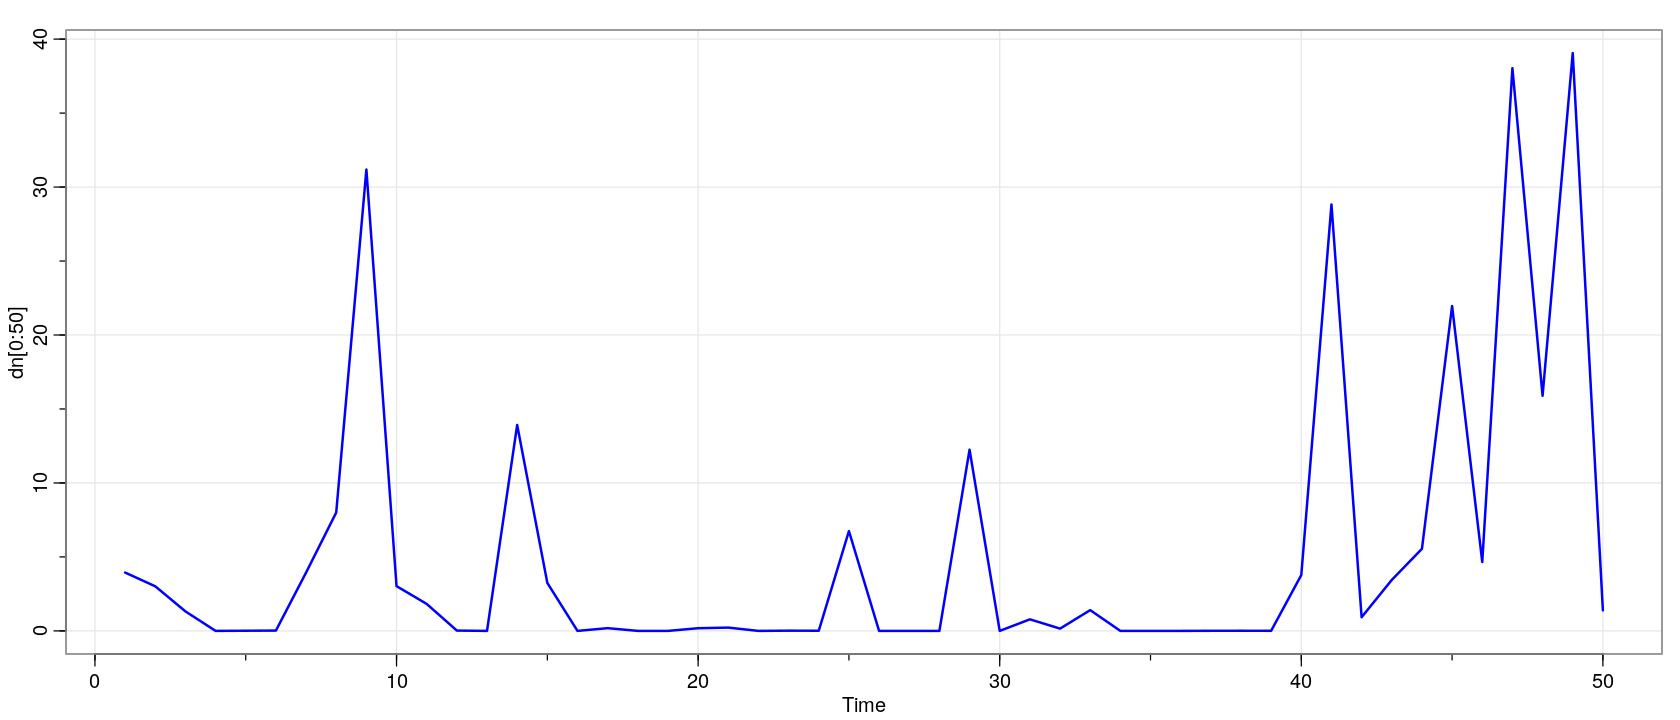

In [11]:
tsplot(dn[0:50], col=4, lwd=2)

In [12]:
# Comentarios Andres clase 09/06/2021

# tirarle periodogramas para asi primero intentar sacar perioricidad

# transformacion log - 
# 
# simular series como estas

# ajuste, simular escenarios y calcular promedios de costos e inetrvalos de confianza




# luego vemos si hacemos un modelo de markov (leer los notebooks que hay disponible, no lo vamos a ver en el curso pero probablemente caminen bien)





Probamos haciendo la transformacion log que comentó Andrés. (10/06/2021)

In [13]:
# agrego para probar +1 para evitar log(0)= -inf
ldn = log(dn+1)
ldnt = log(dnt+1)

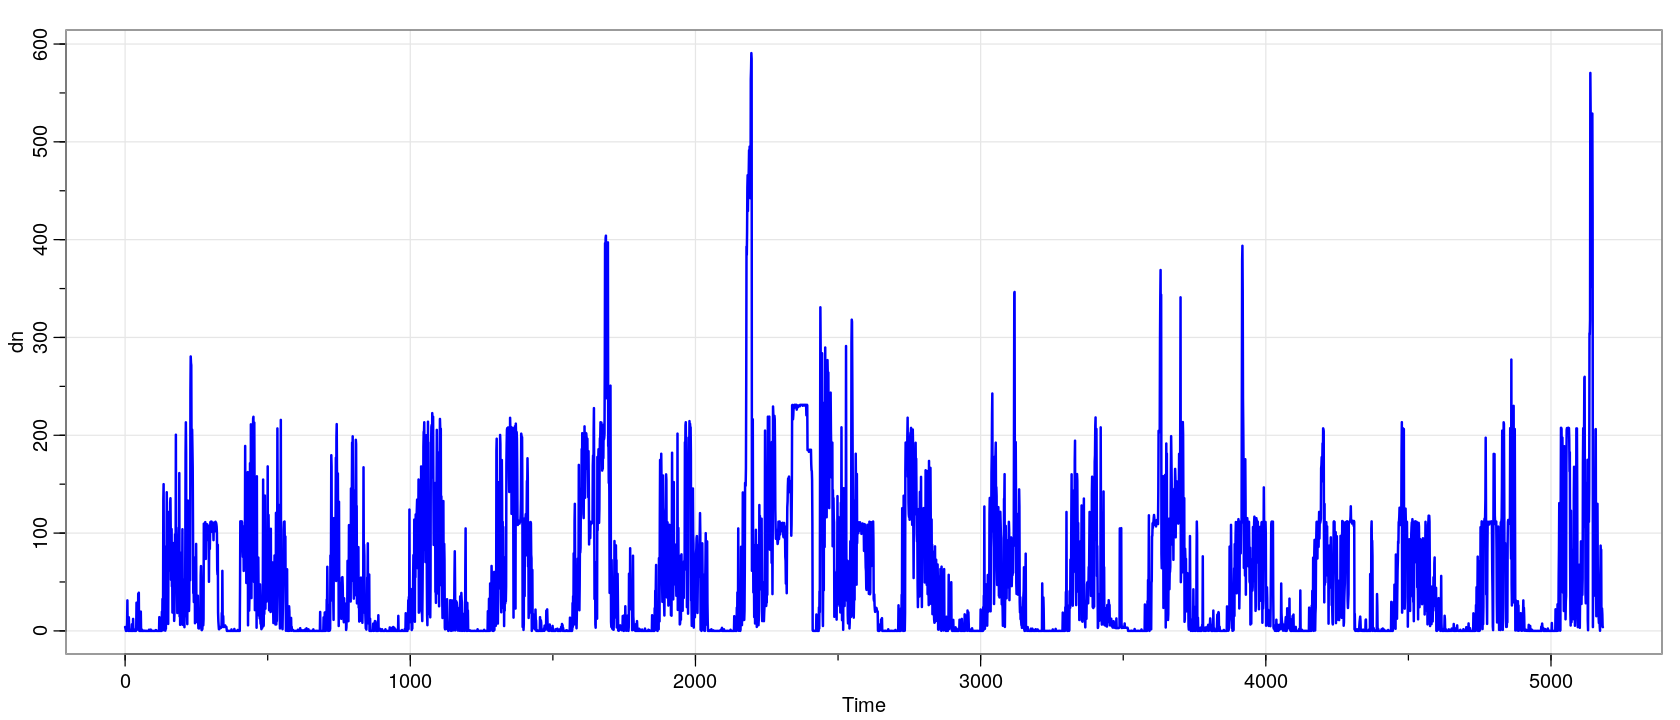

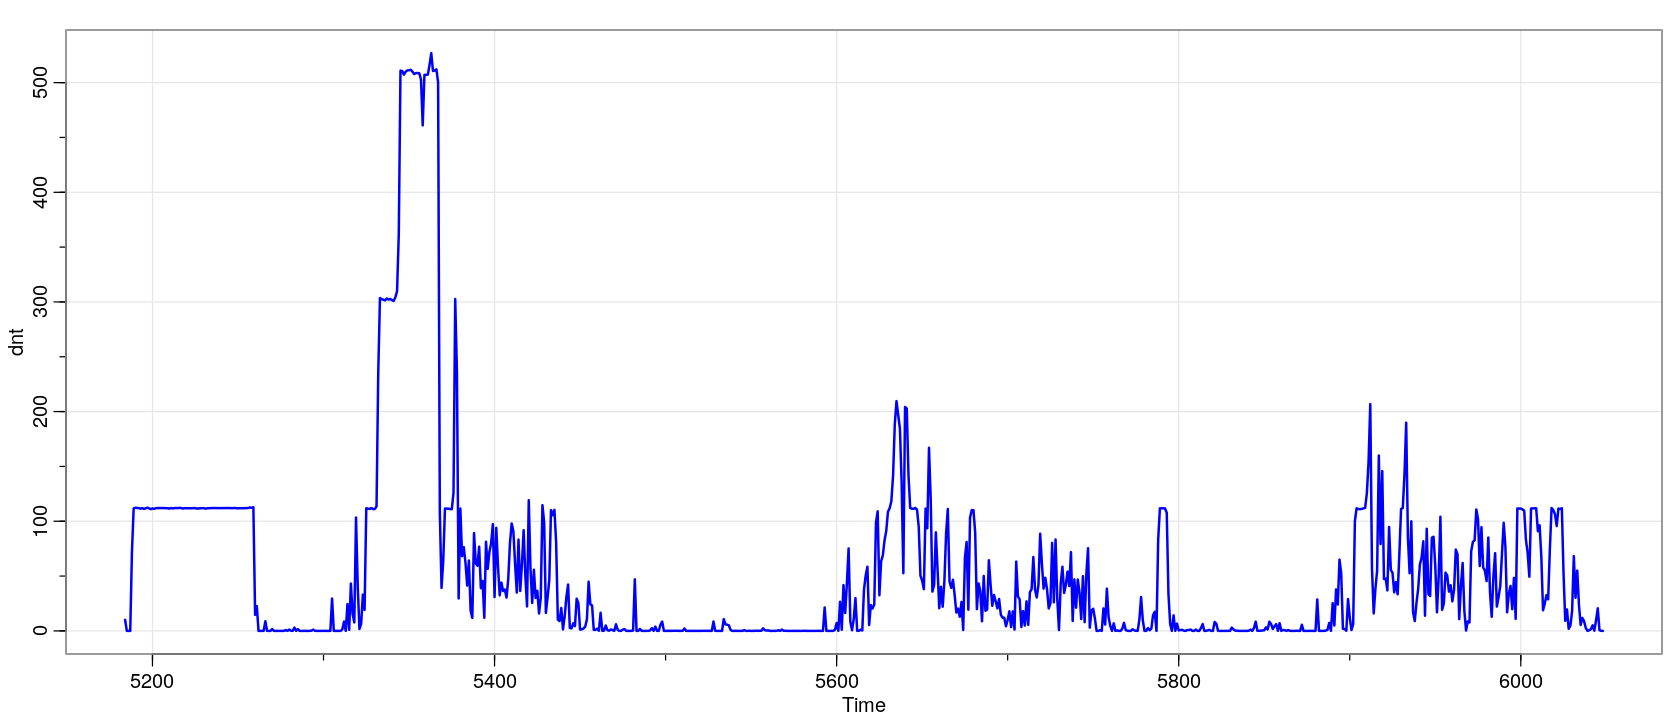

In [14]:
tsplot(dn, col=4, lwd=2)
tsplot(dnt, col=4, lwd=2)


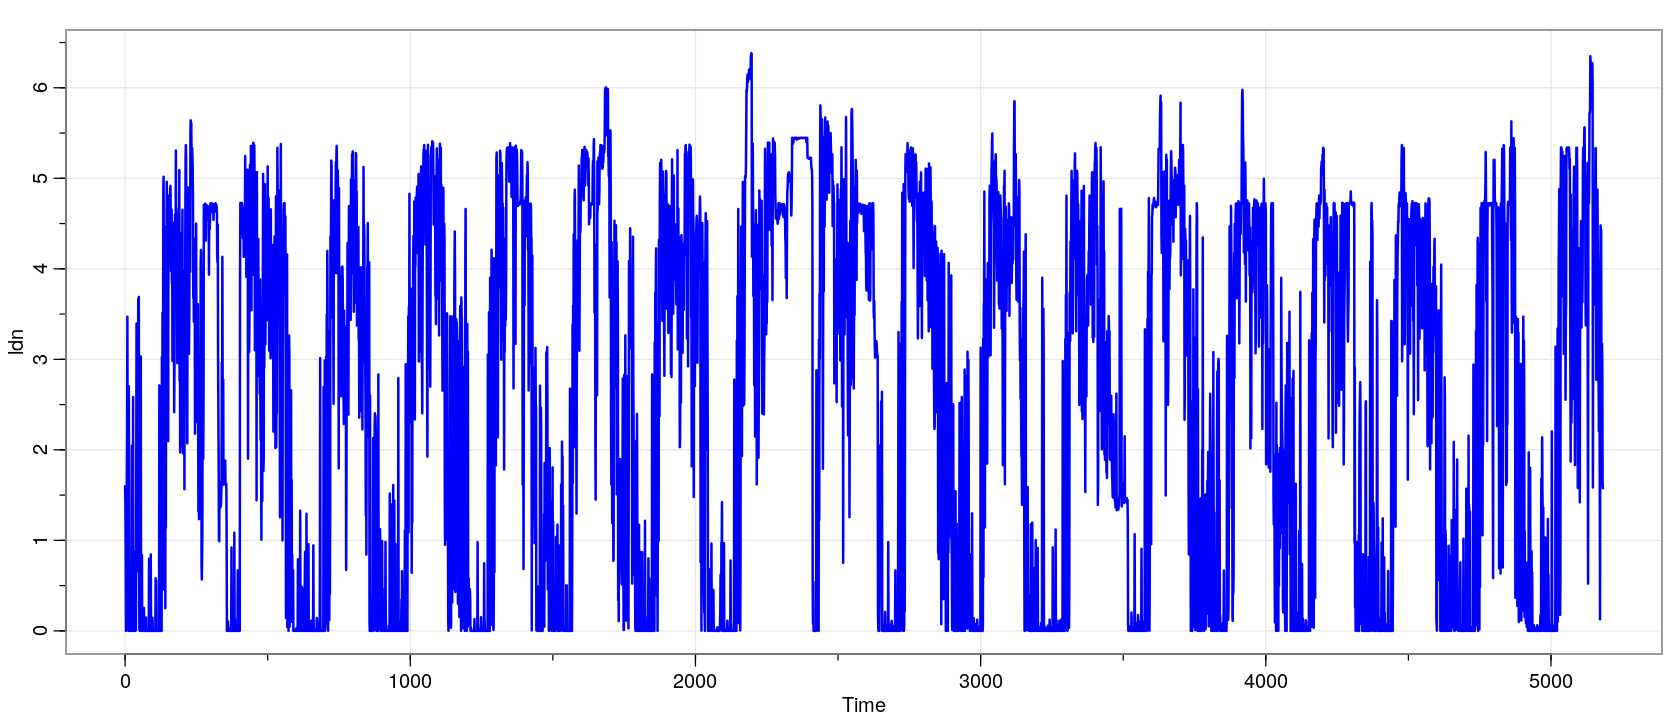

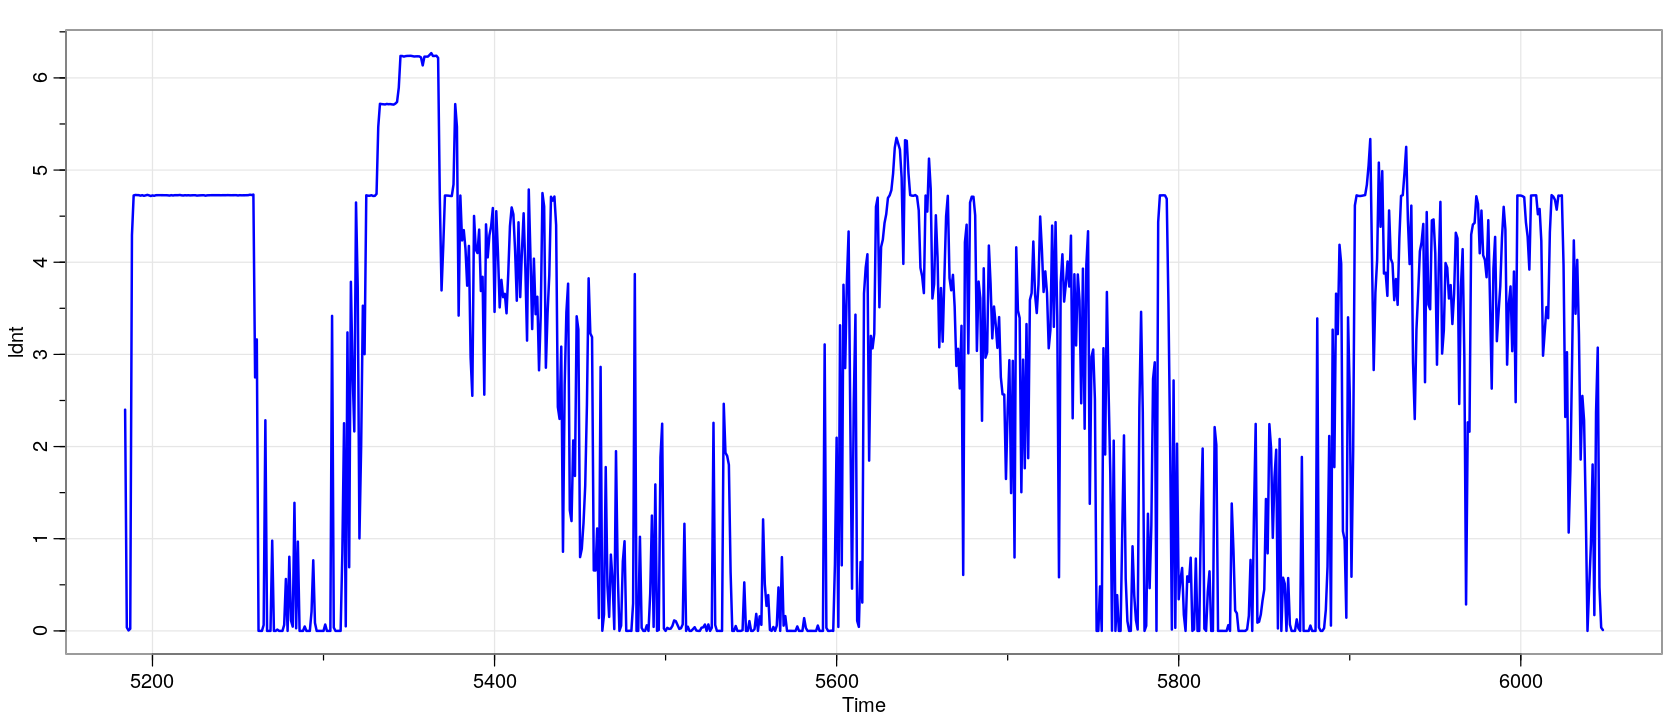

In [15]:
tsplot(ldn, col=4, lwd=2)
tsplot(ldnt, col=4, lwd=2)

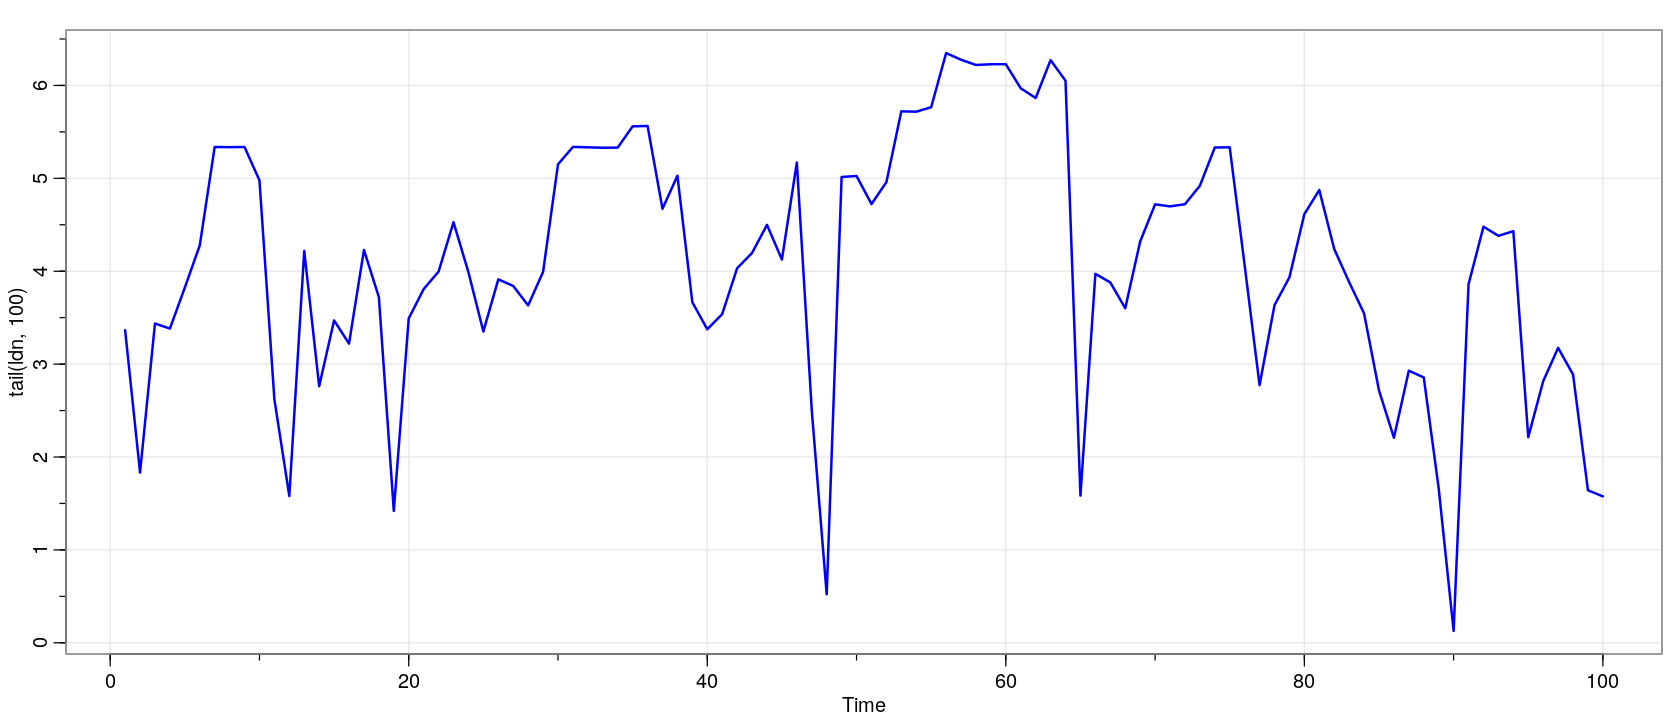

In [27]:
tsplot(tail(ldn,100), col=4, lwd=2)

In [28]:
t = time(ldn)


Call:
lm(formula = ldn ~ t, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6436 -2.4954  0.4345  1.9538  3.7952 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.545e+00  5.615e-02  45.319   <2e-16 ***
t           1.973e-05  1.876e-05   1.052    0.293    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.021 on 5181 degrees of freedom
Multiple R-squared:  0.0002134,	Adjusted R-squared:  2.045e-05 
F-statistic: 1.106 on 1 and 5181 DF,  p-value: 0.293


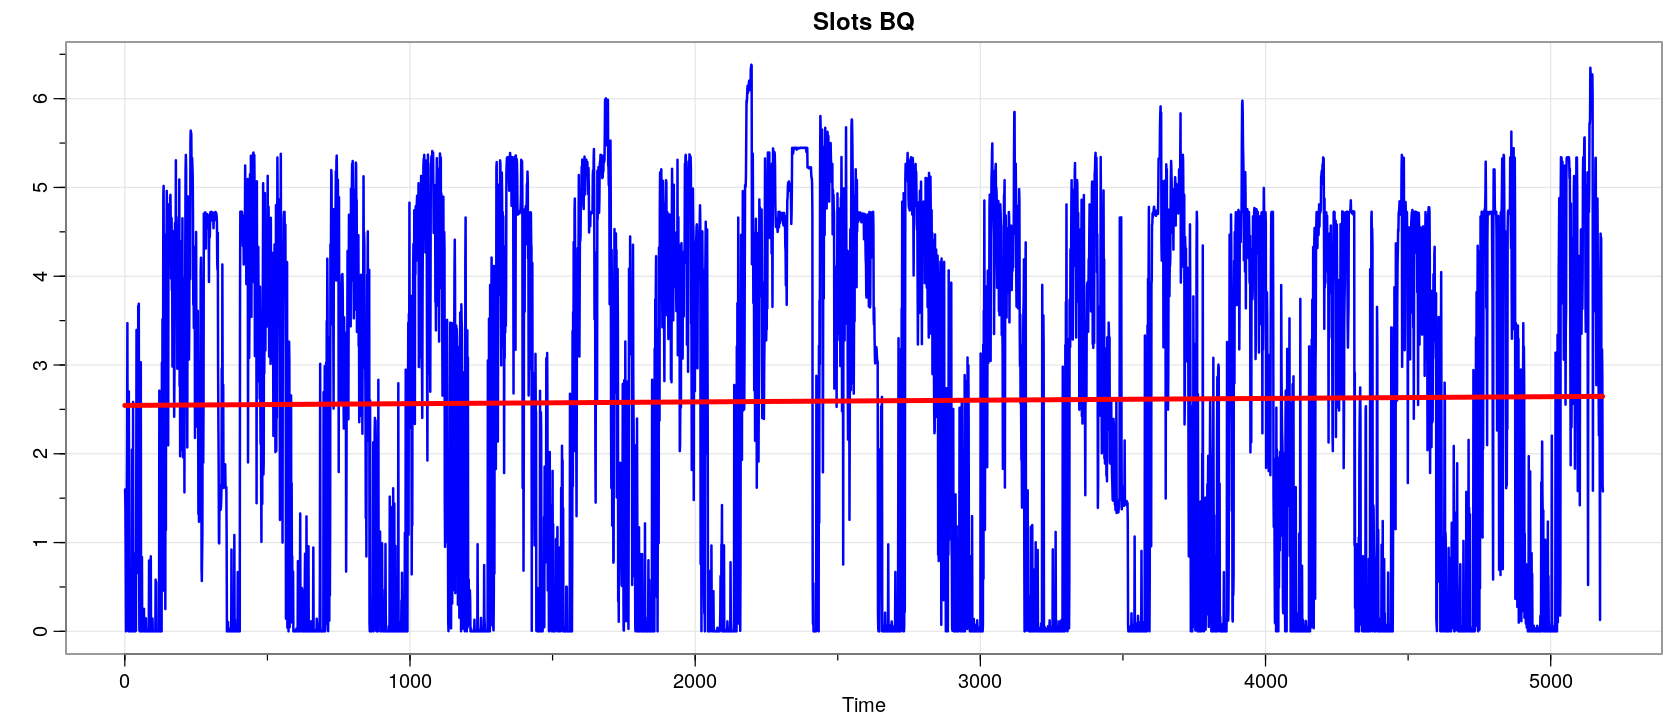

In [29]:
fit = lm(ldn ~ t, na.action=NULL)
summary(fit)

num = length(ldn)

tsplot(ldn, ylab="", main="Slots BQ", col=4, lwd=2)
ndata <- data.frame(t = 5184)
predict_trend = predict(fit,newdata=ndata)
predicttrend = ts(fitted(fit), start=0, freq=1)
lines(predicttrend, col=2, lwd=4)

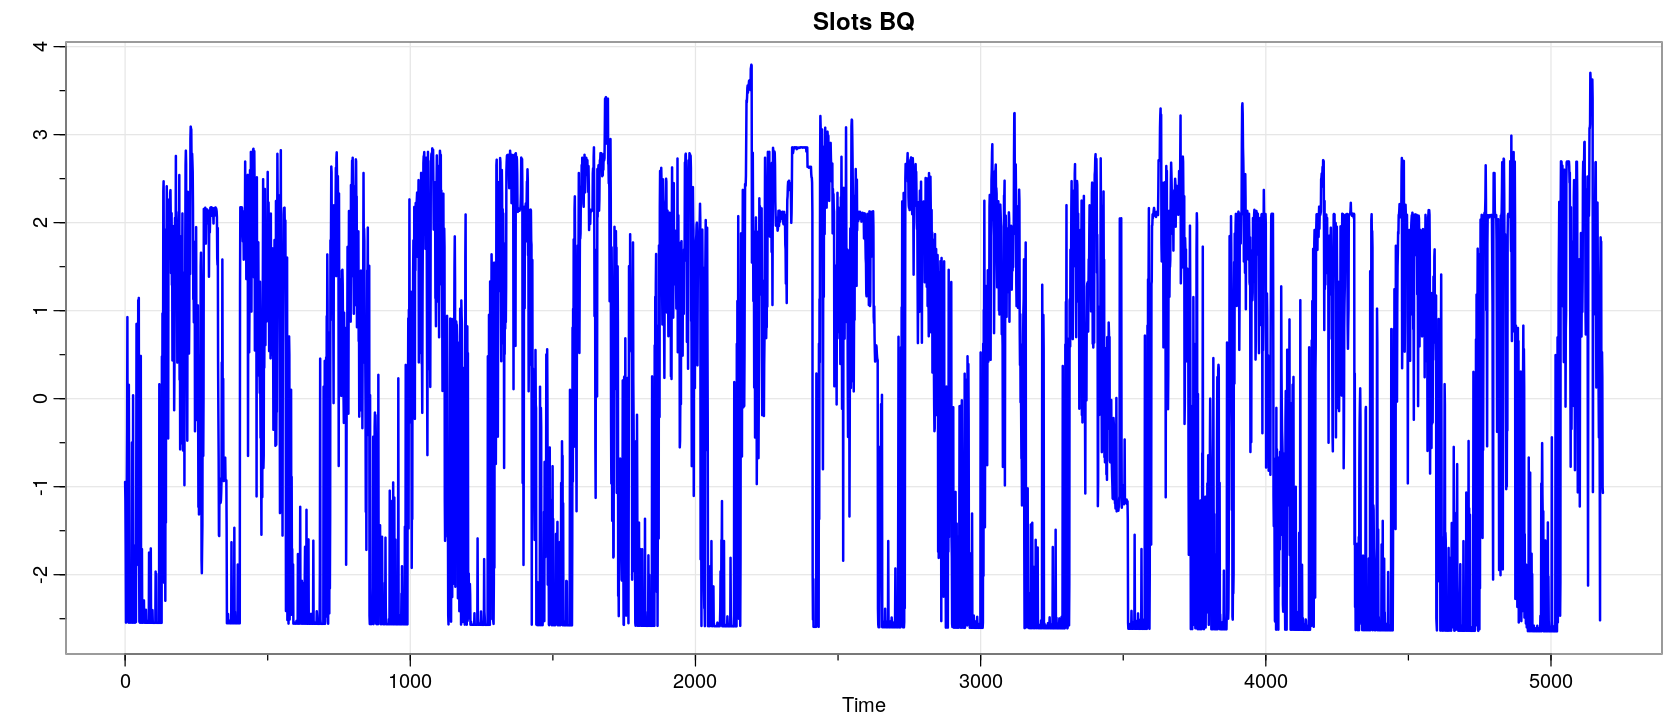

In [30]:
ldn = as.numeric(ldn)
ldnc = ldn-predicttrend

tsplot(ldnc, ylab="", main="Slots BQ", col=4, lwd=2)

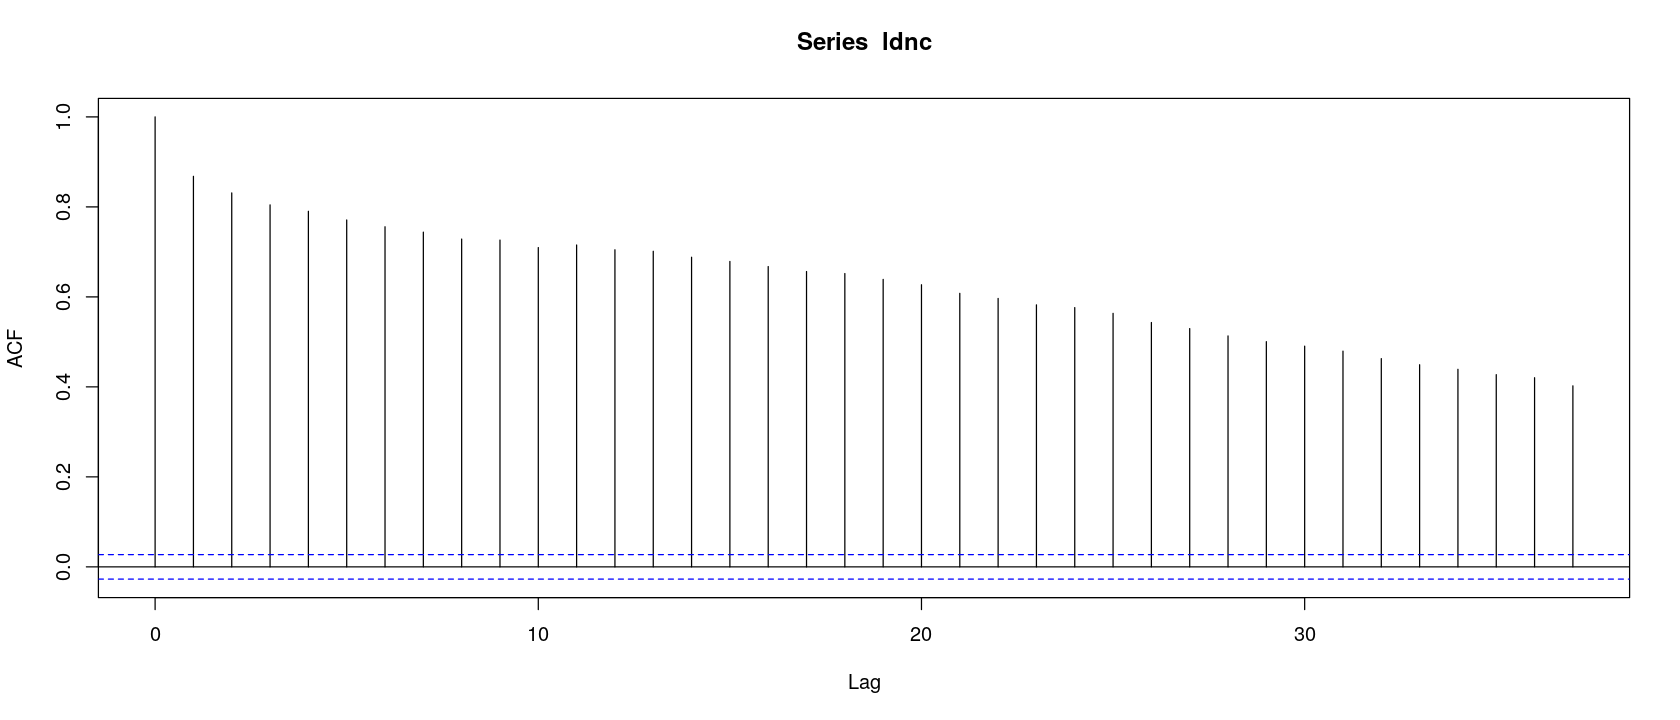

In [31]:
acf(ldnc)

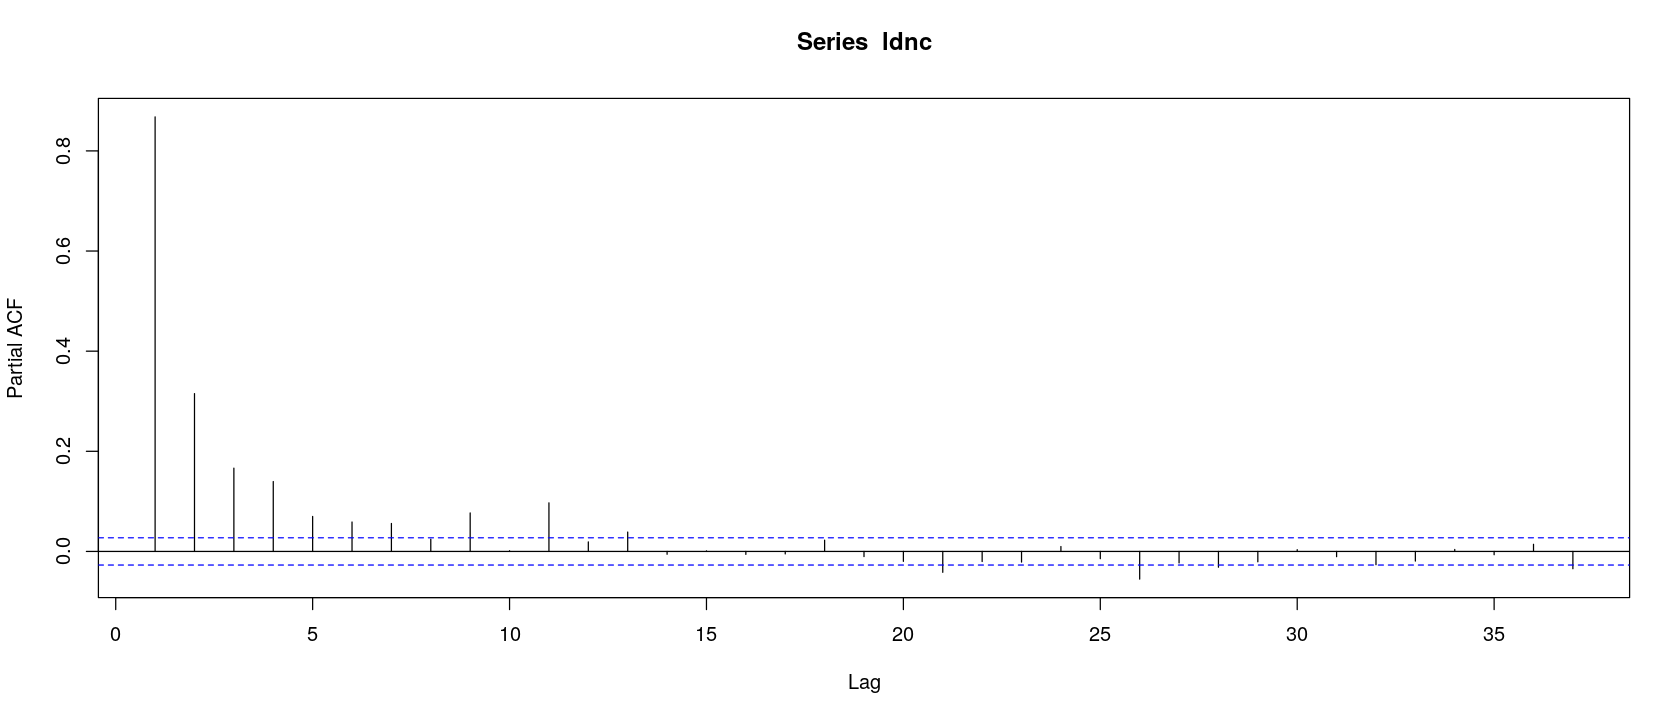

In [32]:
pacf(ldnc)

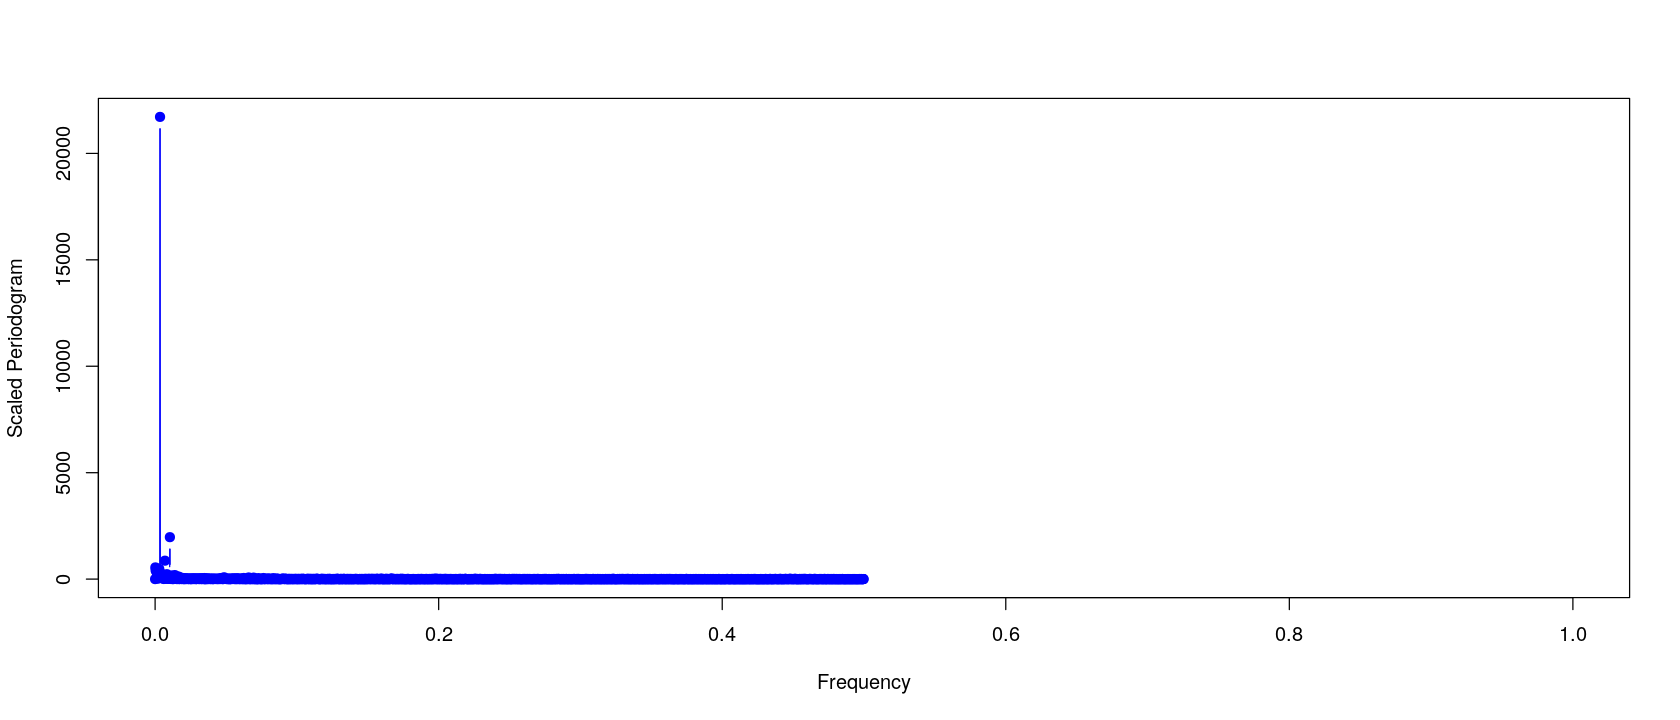

In [33]:
# Periodograma
n=length(ldnc)

P = 4/n*abs(fft(ldnc))^2 
P=P[1:floor(n/2)]#me quedo con las frecuencias posibles
f = (0:(n/2-1))/n #*12 ##El *12 es para llevarlo a la frecuencia original de la serie.
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", xlim=c(0, 1), col=4, lwd=1, pch=19)

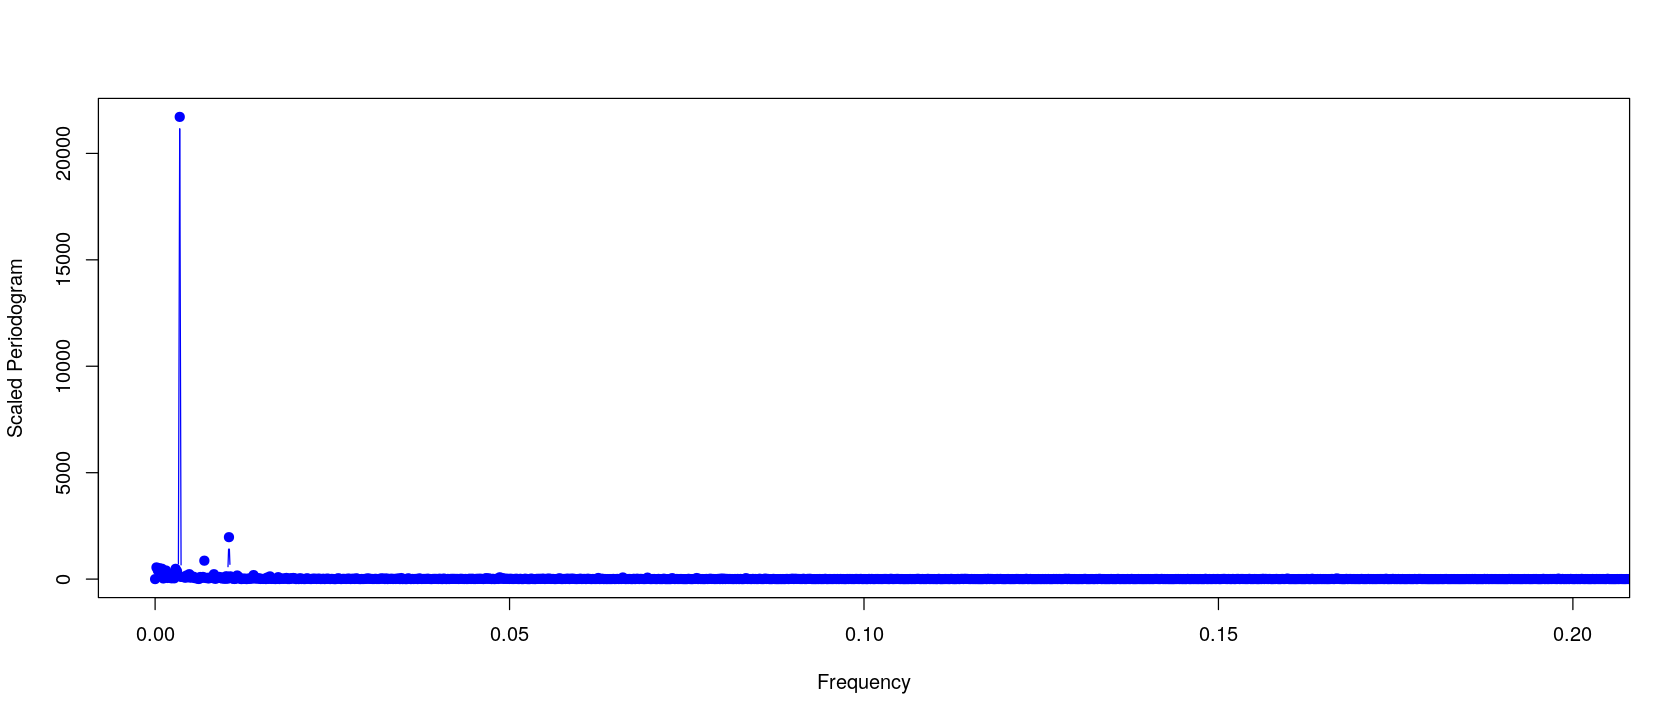

In [34]:
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", xlim=c(0, 0.2), col=4, lwd=1, pch=19)

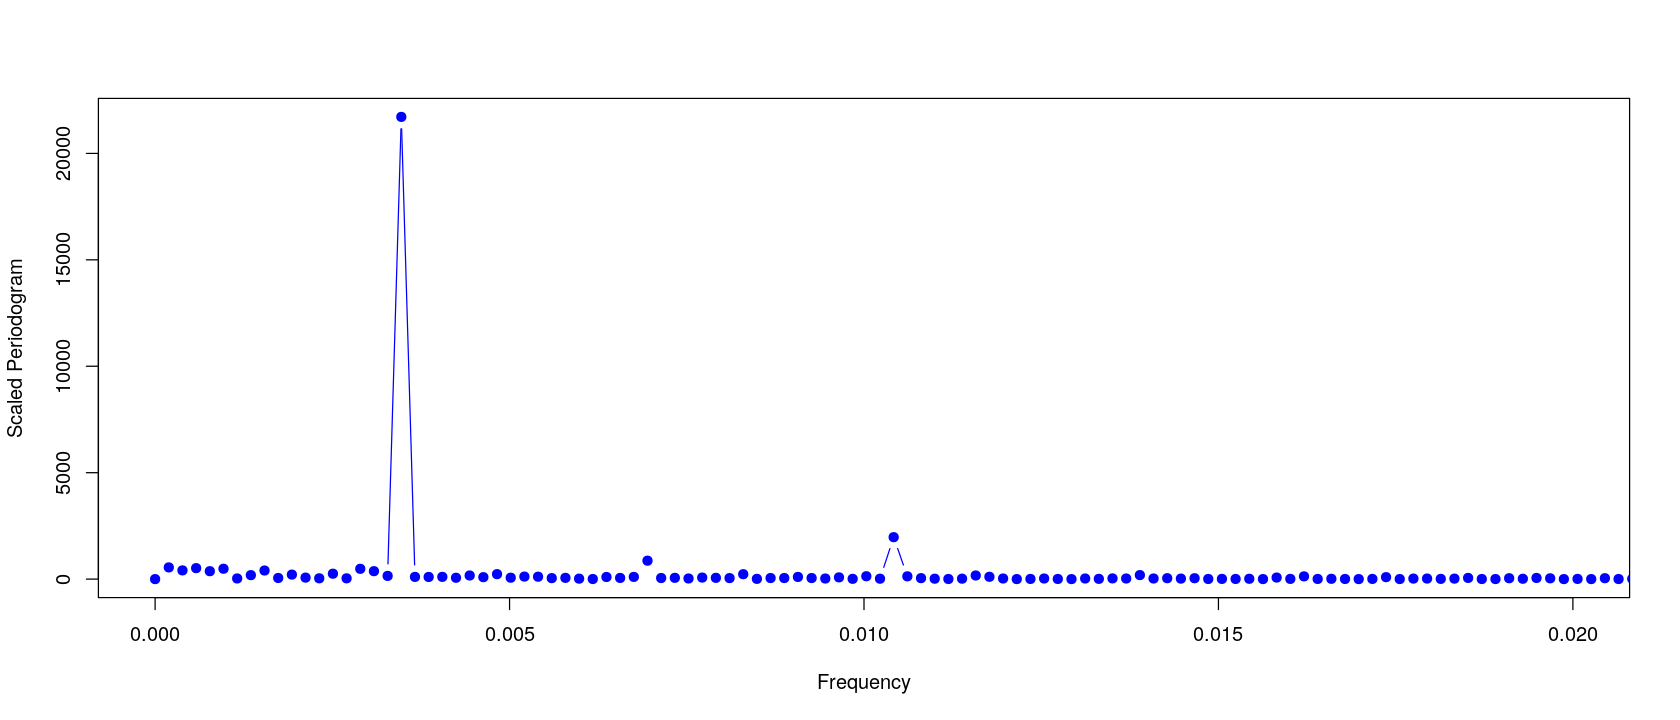

In [35]:
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", xlim=c(0, 0.02), col=4, lwd=1, pch=19)

[1] "0.00347289214740498   21715.3315064483"
[1] "0.00694578429480996   866.084552524173"
[1] "0.0104186764422149   1970.71556742661"


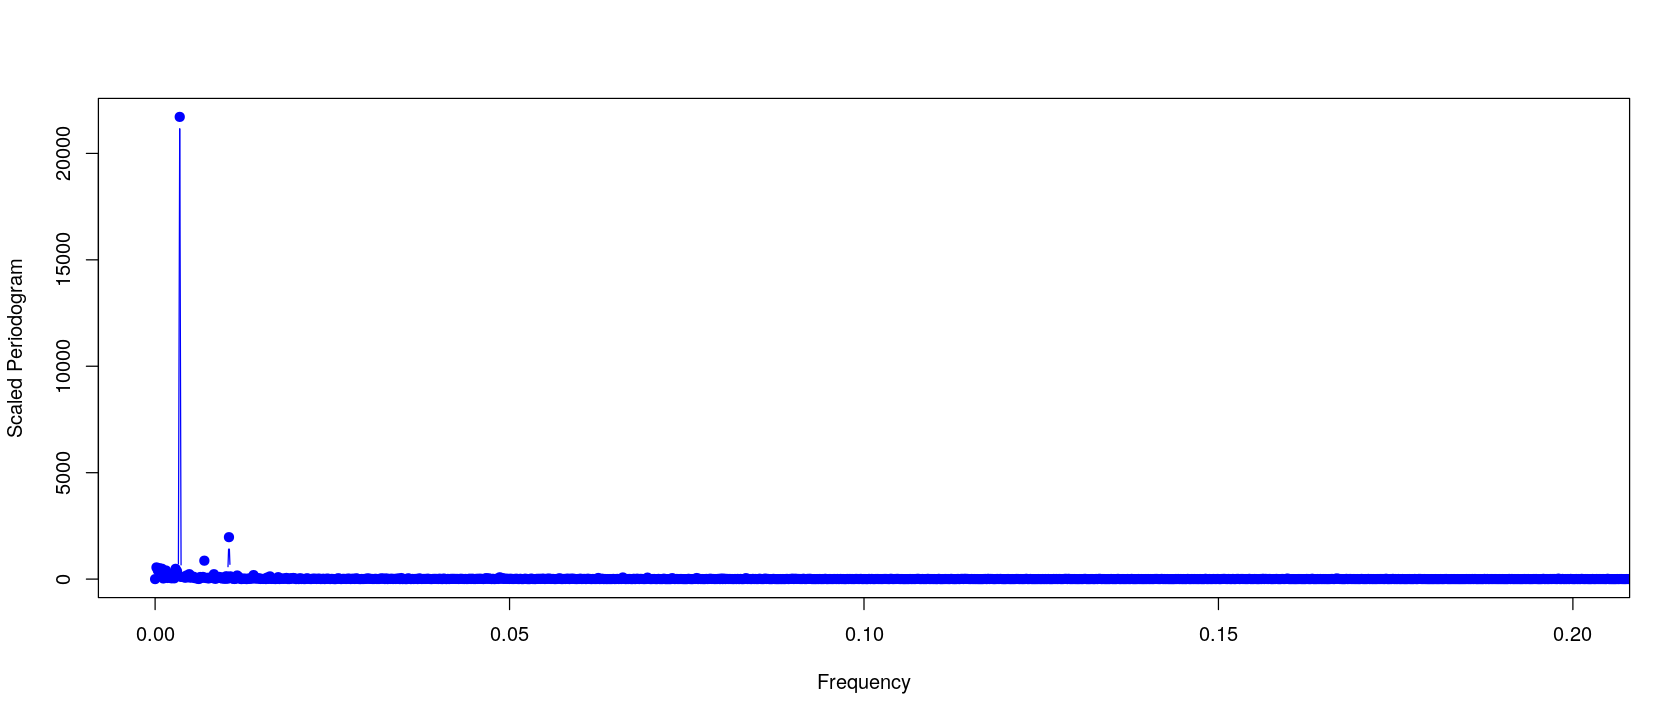

In [36]:
# imprimo de nuevo el periodograma de la serie original transformada
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", xlim=c(0, 0.2), col=4, lwd=1, pch=19)

# me quedo con los valores de un umbral que defino a partir de las primeras observaciones del periodograma
# para elegir las frecuencias
# ajusto el limite de frecuencias a 0.4
P_thresh = 700 # umbral del eje y 
max_freq_idx = length(f)

for (i in (1:max_freq_idx)){
    if (P[i] > P_thresh & f[i] < .2) {
        print(paste(f[i], " " ,P[i]))
        }
}


Call:
lm(formula = ldnc ~ 0 + cos(2 * pi * f1 * t) + sin(2 * pi * f1 * 
    t) + cos(2 * pi * f2 * t) + sin(2 * pi * f2 * t) + cos(2 * 
    pi * f3 * t) + sin(2 * pi * f3 * t), na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7985 -0.8809 -0.0984  0.7018  5.2646 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
cos(2 * pi * f1 * t) -0.14528    0.02573  -5.646 1.73e-08 ***
sin(2 * pi * f1 * t) -2.04181    0.02573 -79.354  < 2e-16 ***
cos(2 * pi * f2 * t)  0.19837    0.02573   7.710 1.50e-14 ***
sin(2 * pi * f2 * t)  0.35731    0.02573  13.887  < 2e-16 ***
cos(2 * pi * f3 * t) -0.42589    0.02573 -16.552  < 2e-16 ***
sin(2 * pi * f3 * t) -0.44545    0.02573 -17.312  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.31 on 5177 degrees of freedom
Multiple R-squared:  0.5802,	Adjusted R-squared:  0.5797 
F-statistic:  1192 on 6 and 5177 DF,  p-value: < 2.2e-16


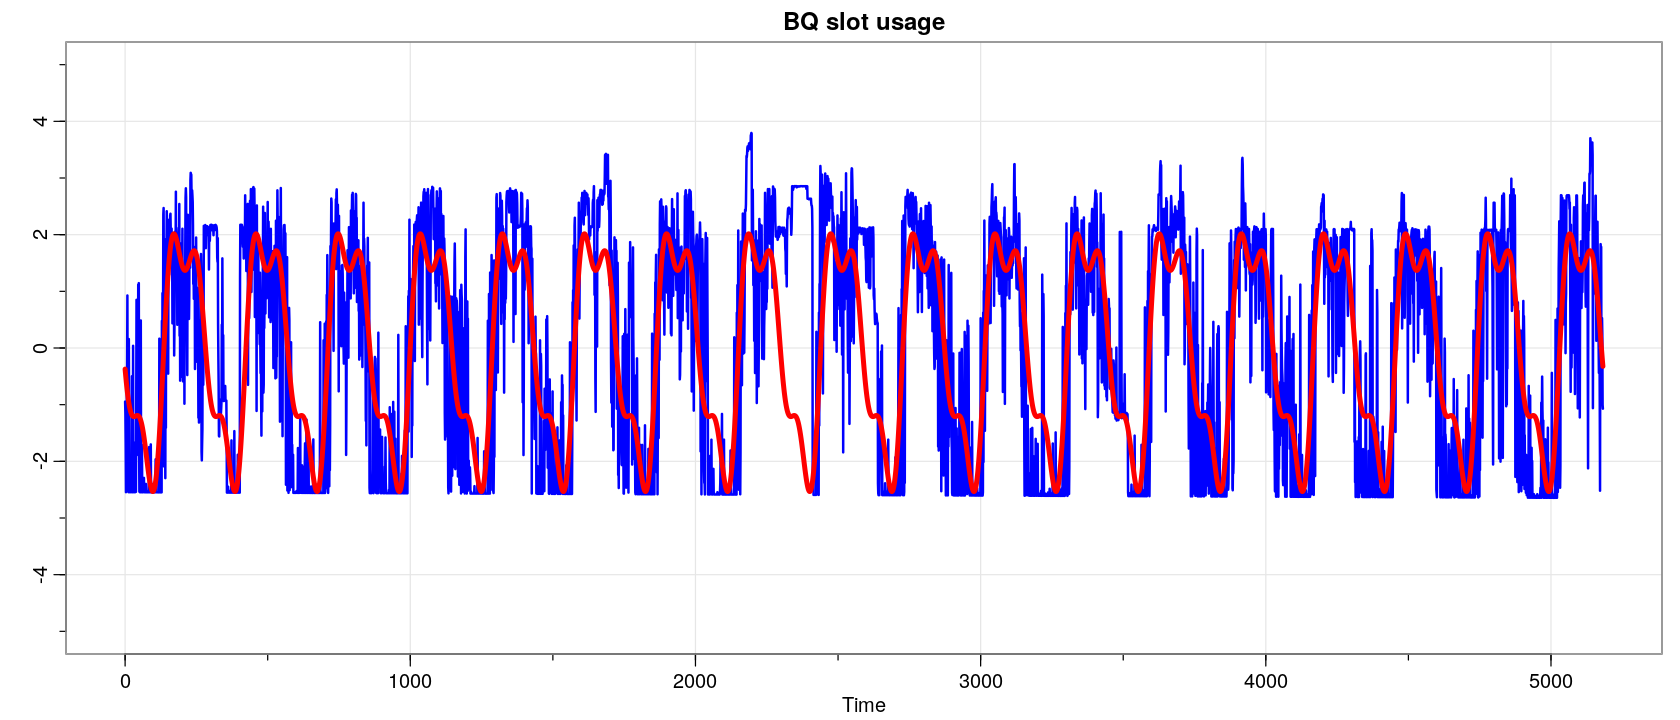

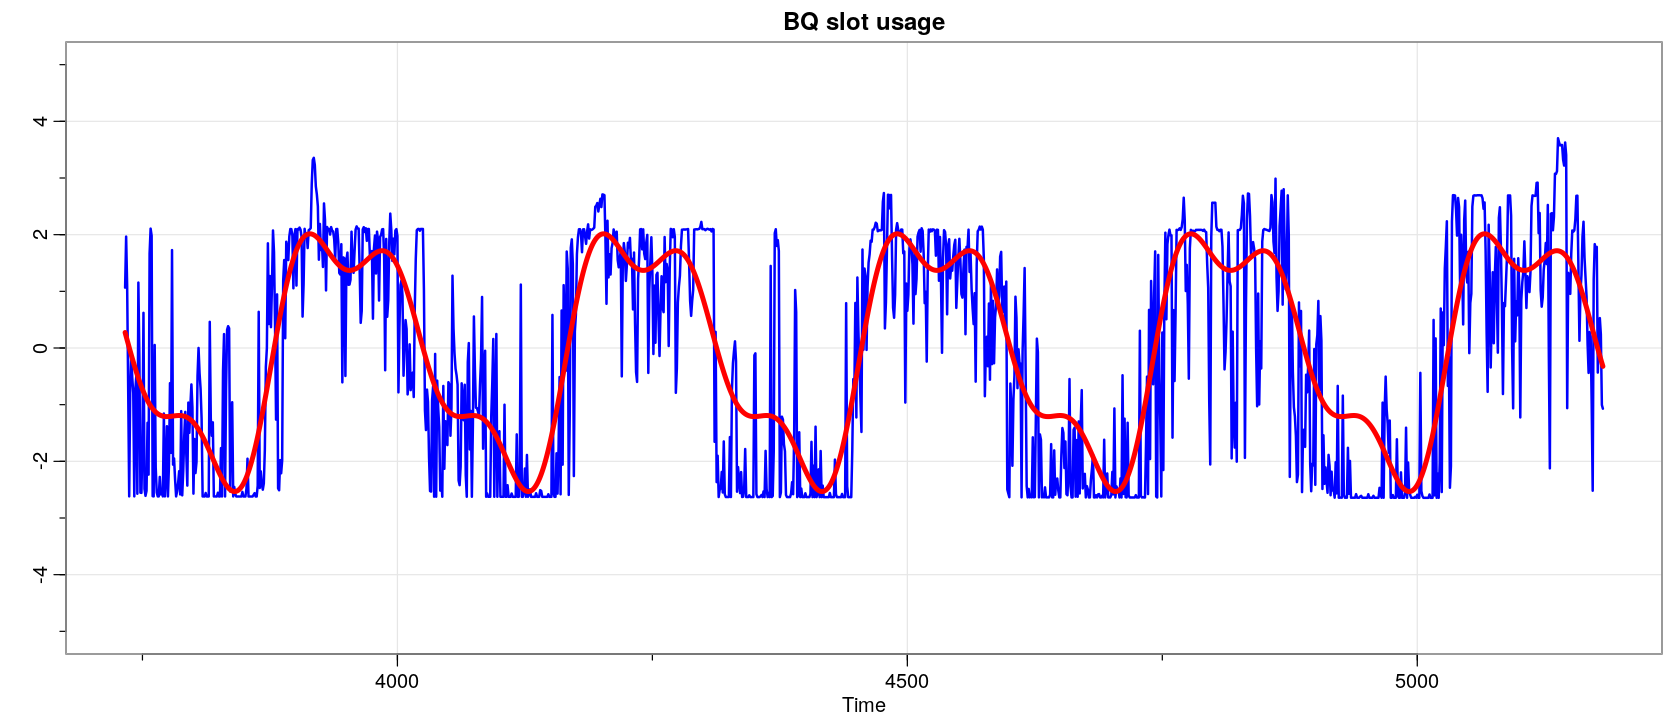

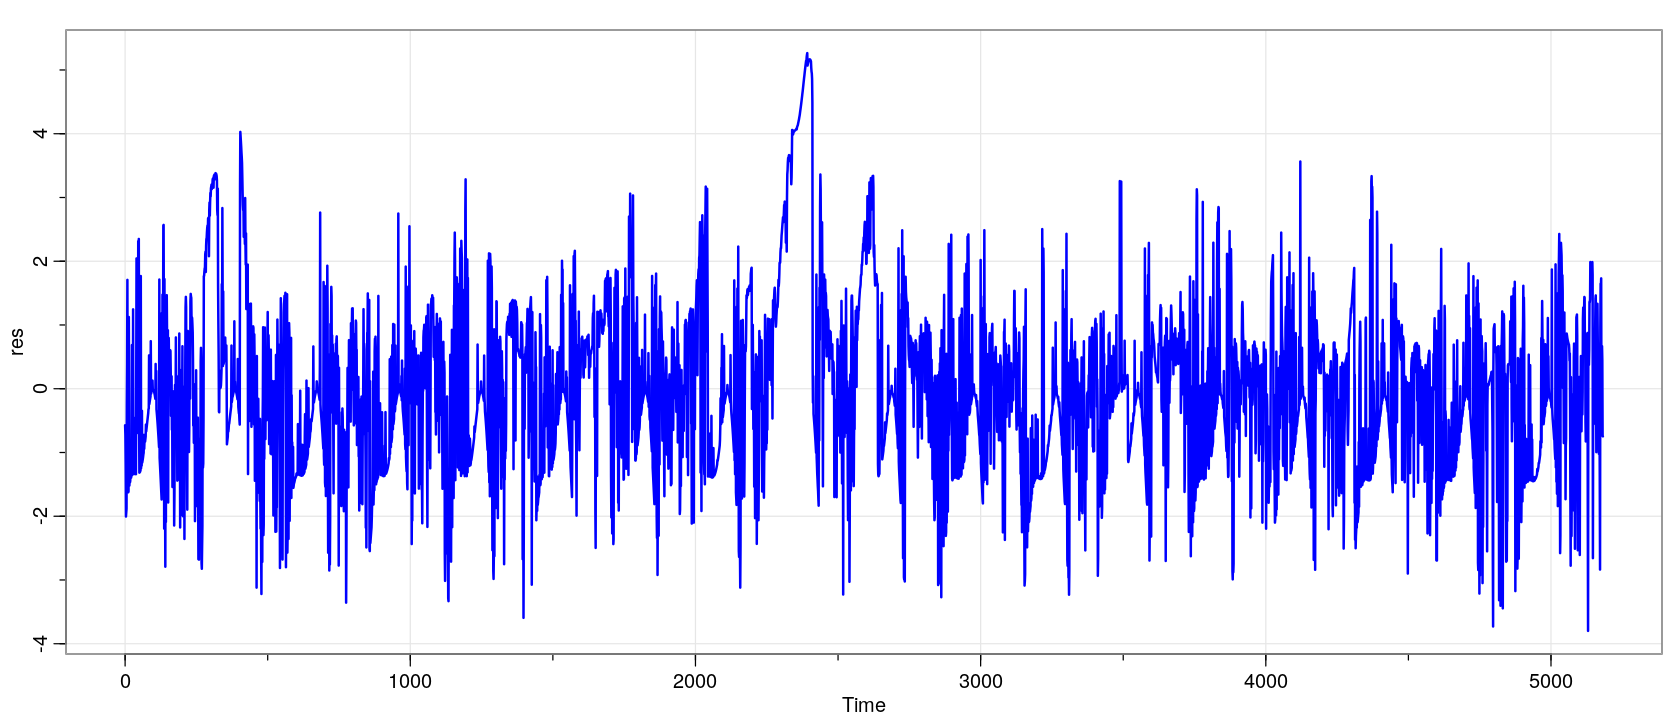

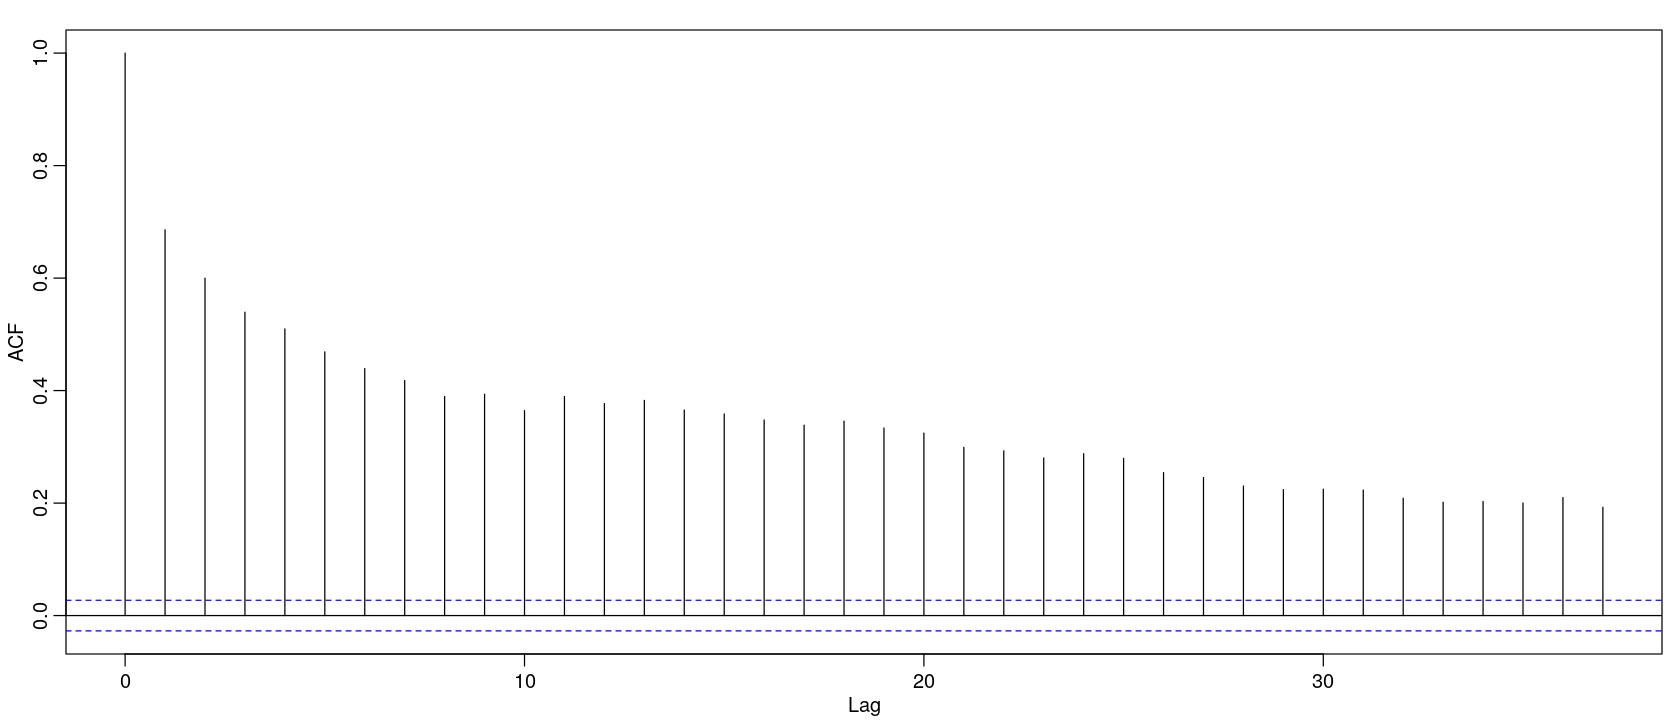

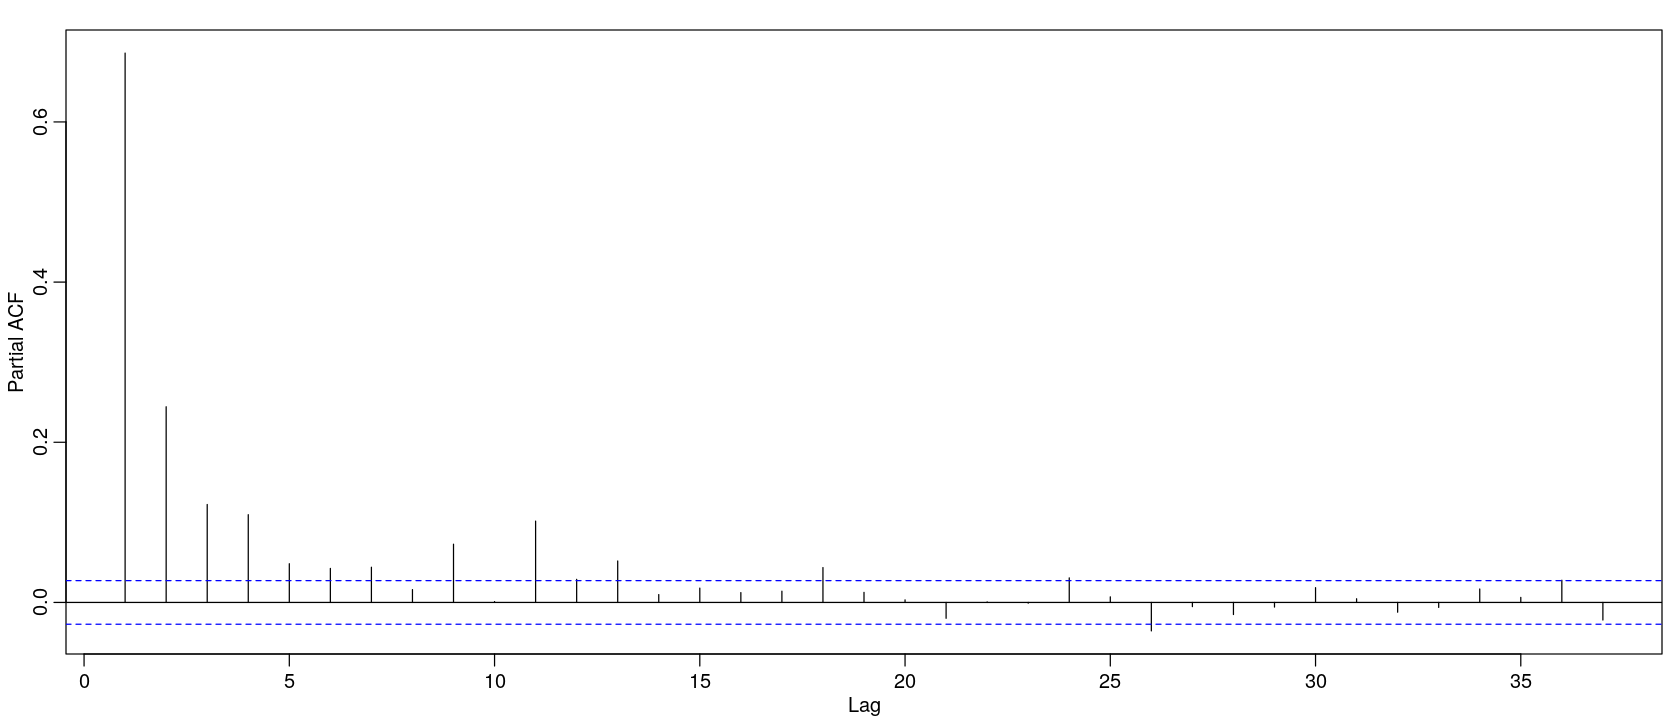

In [37]:
# intento con mas frecuencias, para probar si el acf queda con menos autocorrelacion
t = time(ldnc)

f1 =  0.003473
f2 =  0.006946
f3 =  0.010419

#f1 =  0.000192
#f2 =  0.000385
#f3 =  0.000578
#f4 =  0.000771
#f5 =  0.000964
#f6 =  0.001157
#f7 =  0.002507
#f8 =  0.002893
#f9 =  0.003472
#f10 = 0.004436
#f11 = 0.006944
#f12 = 0.010416
#
#
#fit = lm(ldnc ~ 0 + cos(2*pi*f1*t) + sin(2*pi*f1*t) +
#                  cos(2*pi*f2*t) + sin(2*pi*f2*t) +
#                 cos(2*pi*f3*t) + sin(2*pi*f3*t) +
#                cos(2*pi*f4*t) + sin(2*pi*f4*t) +
#                 cos(2*pi*f5*t) + sin(2*pi*f5*t) +
#                 cos(2*pi*f6*t) + sin(2*pi*f6*t) +
#                 cos(2*pi*f7*t) + sin(2*pi*f7*t) +
#                 cos(2*pi*f8*t) + sin(2*pi*f8*t) +
#                 cos(2*pi*f9*t) + sin(2*pi*f9*t) +
#                 cos(2*pi*f10*t) + sin(2*pi*f10*t) +
#                 cos(2*pi*f11*t) + sin(2*pi*f11*t) +
#                 cos(2*pi*f12*t) + sin(2*pi*f12*t),
#         na.action=NULL)


#f1 =  0.000192
#f2 =  0.000385
#f3 =  0.000578
#f4 =  0.000771
#f5 =  0.000964
#f6 =  0.001157
#f7 =  0.001543
#f8 =  0.002508
#f9 =  0.002894
#f10 = 0.003279
#f11 = 0.003472
#f12 = 0.003858
#f13 = 0.004437
#f14 = 0.006945
#f15 = 0.010418


fit = lm(ldnc ~ 0 + cos(2*pi*f1*t) + sin(2*pi*f1*t) +
                  cos(2*pi*f2*t) + sin(2*pi*f2*t) +
                 cos(2*pi*f3*t) + sin(2*pi*f3*t) ,
         na.action=NULL)




summary(fit)       # regression results


prediction = ts(fitted(fit), start=0, freq=1)


# hago la prediccion para el primer valor de la serie de test
tn = start_test - 1 
v = 0 + cos(2*pi*f1*tn) + sin(2*pi*f1*tn) +
              cos(2*pi*f2*tn) + sin(2*pi*f2*tn) +
             cos(2*pi*f3*tn) + sin(2*pi*f3*tn)
vdf <- data.frame(t = v)
# la prediccion de la serie compuesta por series periodicas
fore_f = predict(fit, vdf)    


tsplot(ldnc, ylab="", main="BQ slot usage", col=4, lwd=2, ylim=c(-5,5))
lines(prediction, col=2, lwd=4)


tsplot(tail(ldnc,1450), ylab="", main="BQ slot usage", col=4, lwd=2, ylim=c(-5,5))
lines(tail(prediction,1450), col=2, lwd=4)

res = (ts(residuals(fit), start=0, freq=1))
#res = (ts(ldnc-prediction, start=0, freq=1))
tsplot(res, col=4, lwd=2)
acf(res)
pacf(res)

In [38]:
ldncr1 = res

Series: ldncr1 
ARIMA(6,0,0) with zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ar6
      0.4675  0.1541  0.0583  0.0799  0.0285  0.0427
s.e.  0.0139  0.0153  0.0154  0.0154  0.0153  0.0139

sigma^2 estimated as 0.8277:  log likelihood=-6861.67
AIC=13737.35   AICc=13737.37   BIC=13783.22

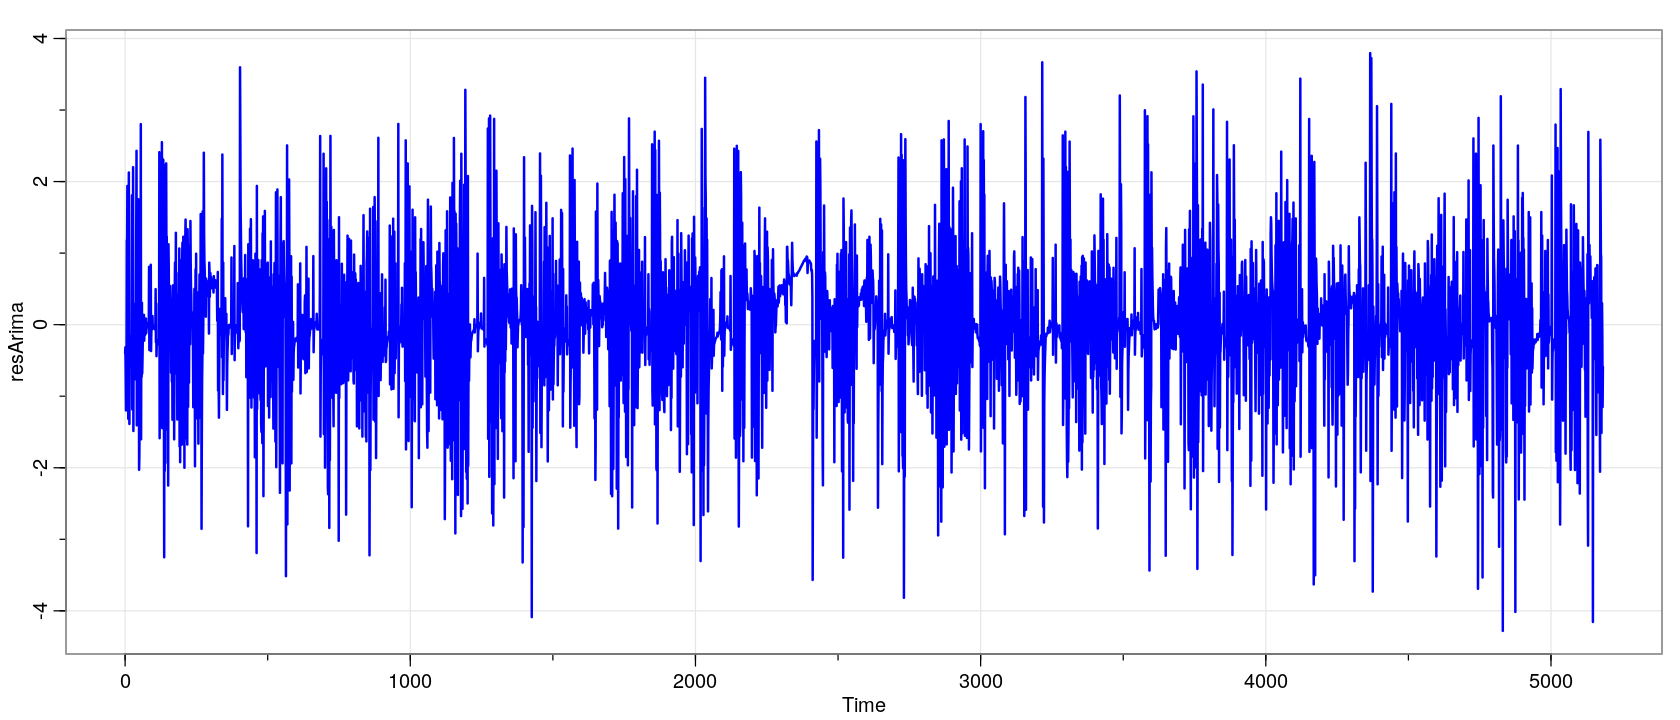

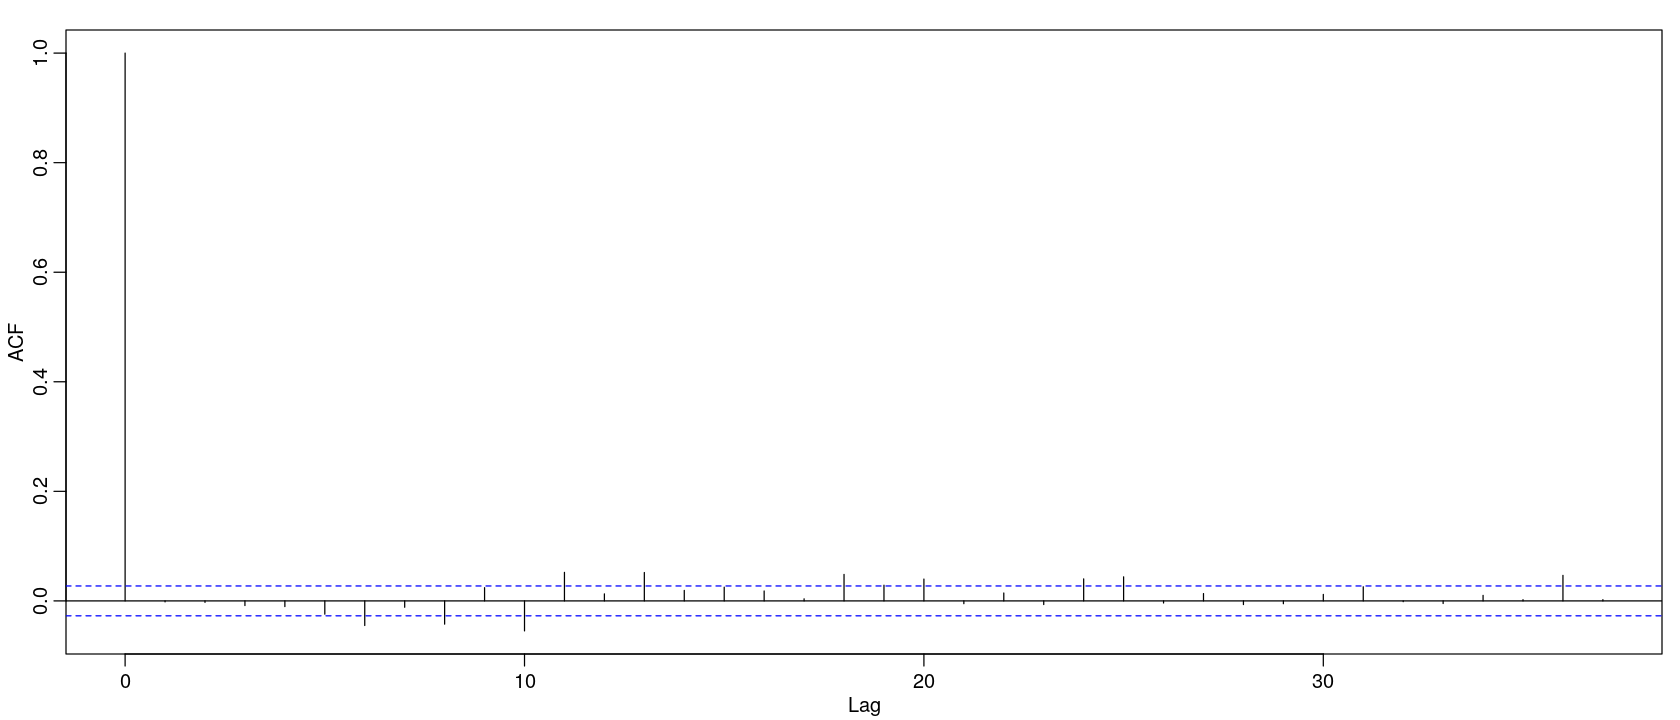

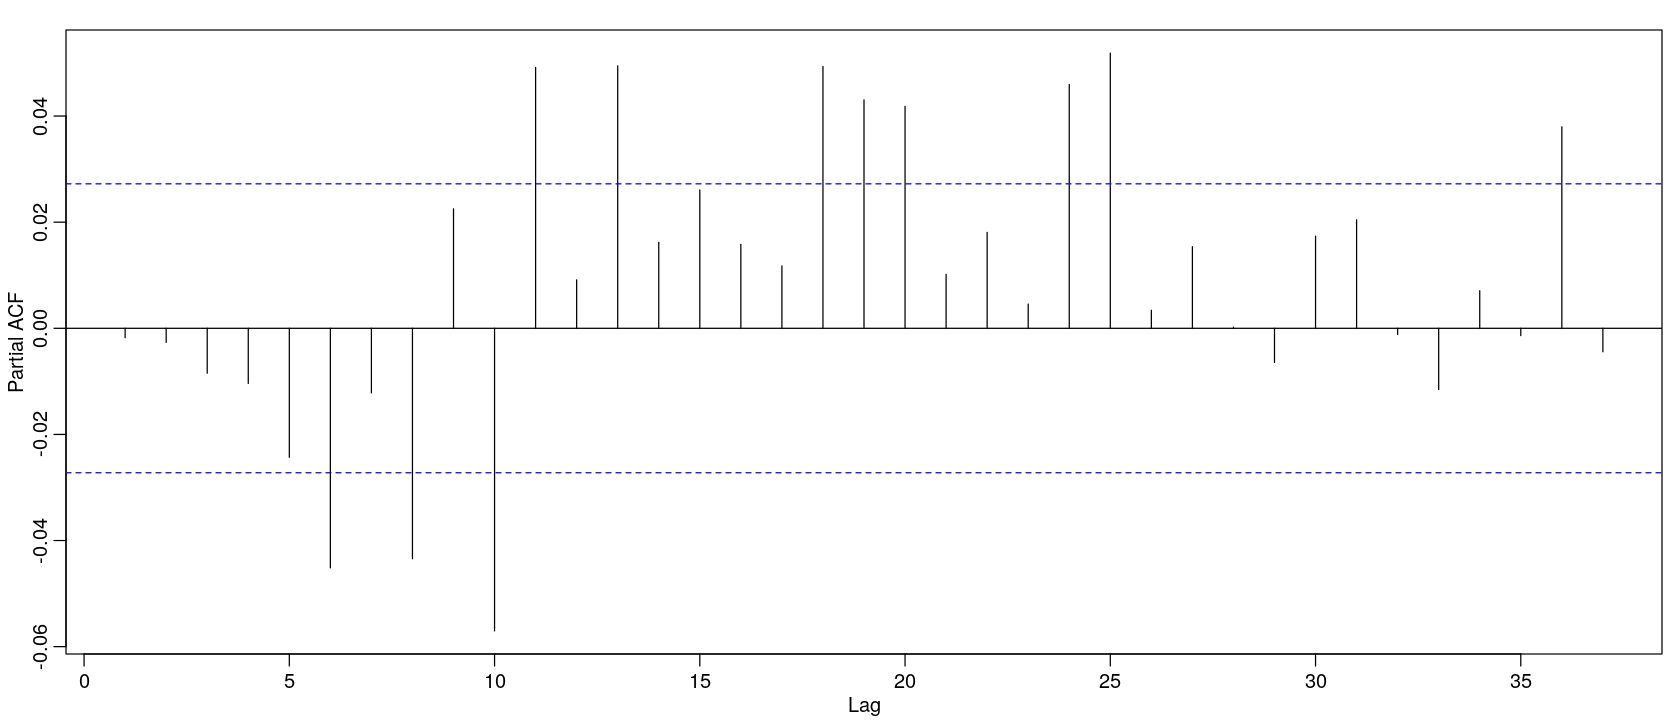

In [39]:

# no me quedo claro de acuerdo a acf y pacf que parametros elegir, pero parece que en lag 4 pasa algo...
# probe con 4 coeficientes para ar y para ma , lo que parece mejor es arma(1,4)

# ARMA
fit = Arima(ldncr1, order = c(6,0,0), include.mean=FALSE)
fit

resArima = (ts(residuals(fit), start=0, freq=1))
tsplot(resArima, col=4, lwd=2)

acf(resArima)
pacf(resArima)


Series: ldncr1 
ARIMA(5,0,0) with zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5
      0.4696  0.1577  0.0609  0.0866  0.0485
s.e.  0.0139  0.0153  0.0154  0.0153  0.0139

sigma^2 estimated as 0.829:  log likelihood=-6866.4
AIC=13744.79   AICc=13744.81   BIC=13784.11

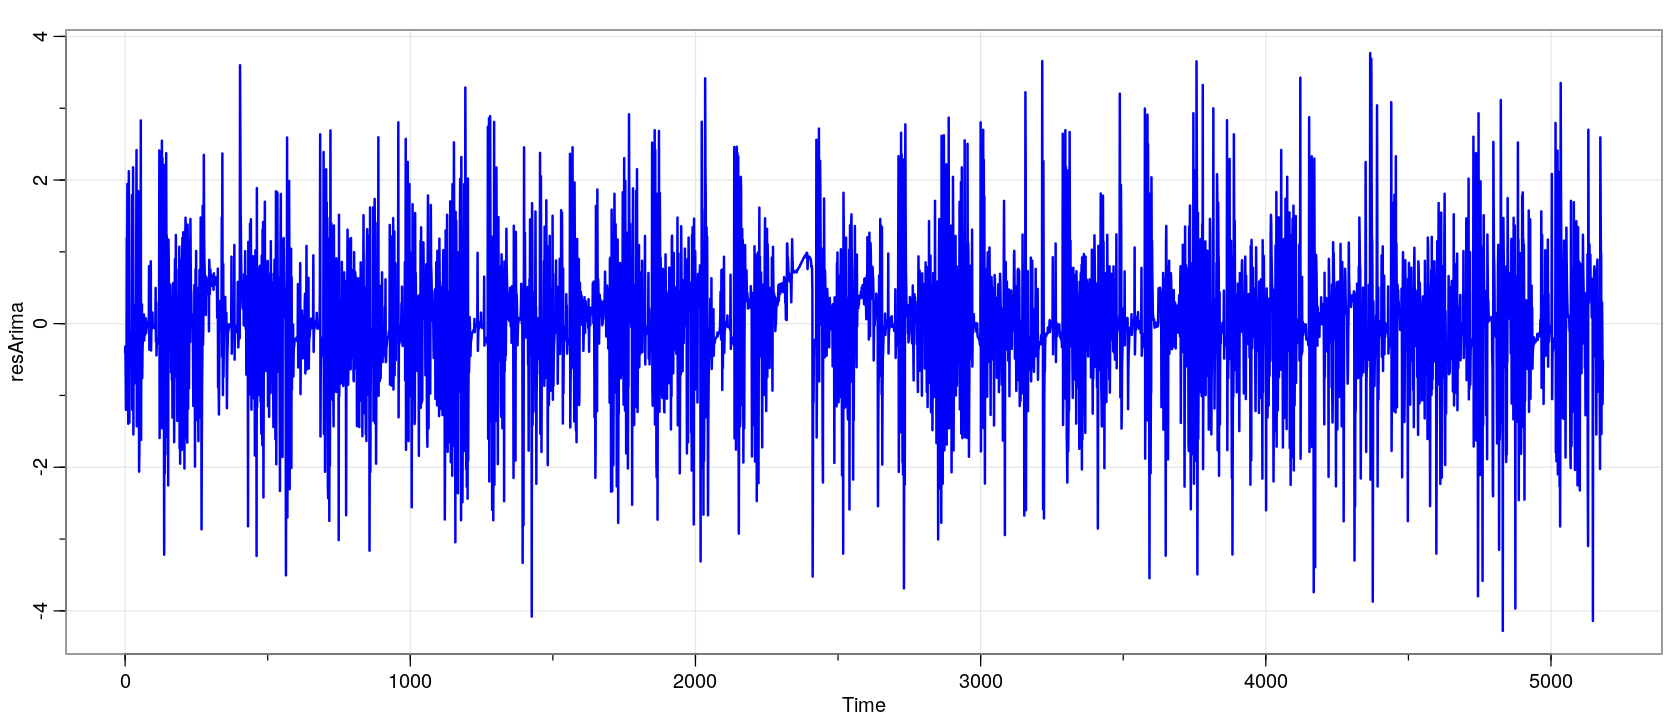

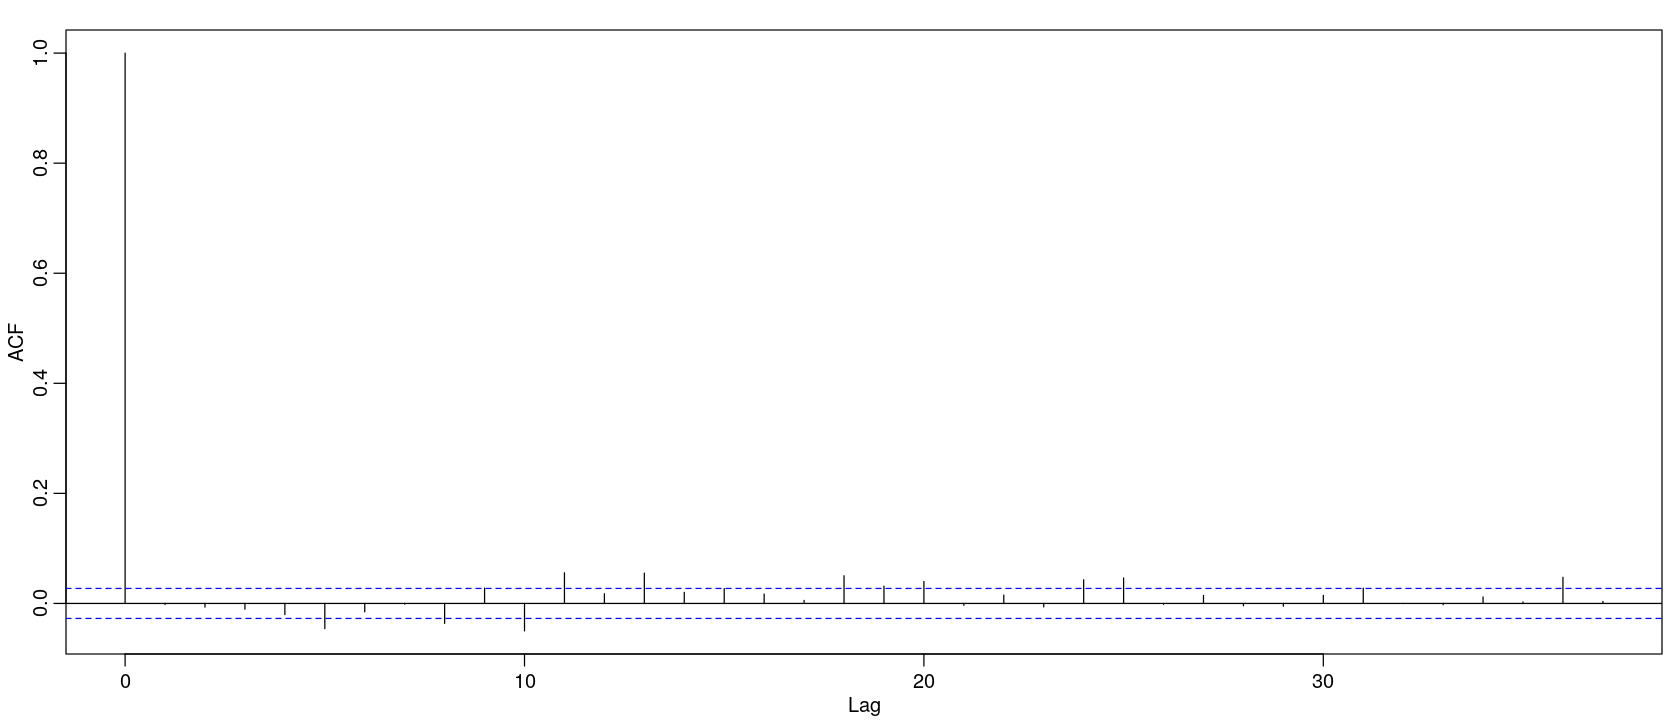

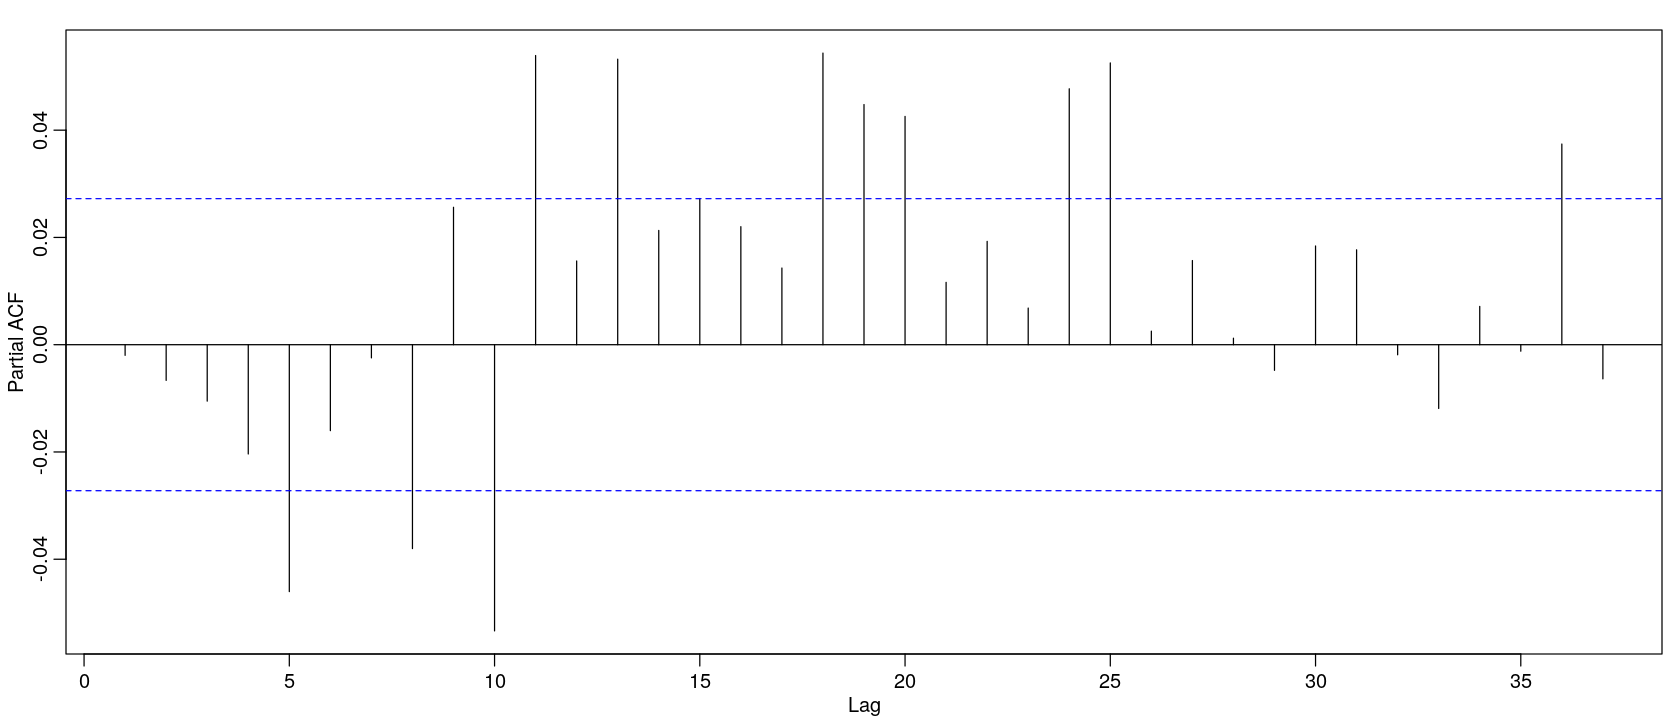

In [47]:

# no me quedo claro de acuerdo a acf y pacf que parametros elegir, pero parece que en lag 4 pasa algo...
# probe con 4 coeficientes para ar y para ma , lo que parece mejor es arma(1,4)

# ARMA
fit = Arima(ldncr1, order = c(5,0,0), include.mean=FALSE)
fit

resArima = (ts(residuals(fit), start=0, freq=1))
tsplot(resArima, col=4, lwd=2)

acf(resArima)
pacf(resArima)

Series: ldncr1 
ARIMA(6,0,0)(6,0,0)[6] with zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ar6     sar1     sar2    sar3
      0.4555  0.1454  0.0570  0.0644  0.0204  0.1111  -0.1053  -0.0064  0.0453
s.e.  0.0140  0.0153  0.0153  0.0156  0.0152  0.0221   0.0240   0.0160  0.0145
        sar4    sar5   sar6
      0.0450  0.0172  0.044
s.e.  0.0142  0.0141  0.014

sigma^2 estimated as 0.8197:  log likelihood=-6833.56
AIC=13693.12   AICc=13693.19   BIC=13778.31

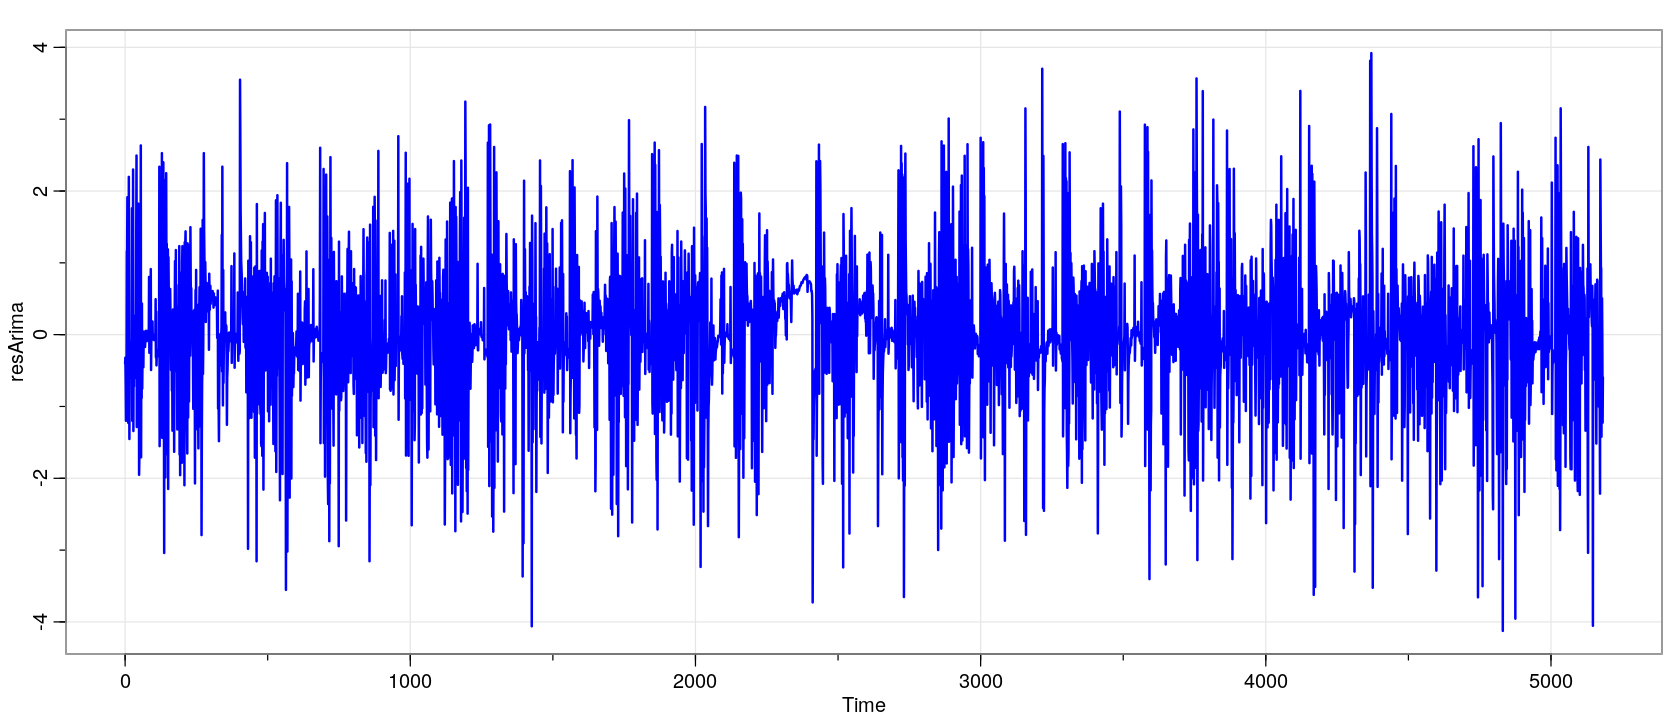

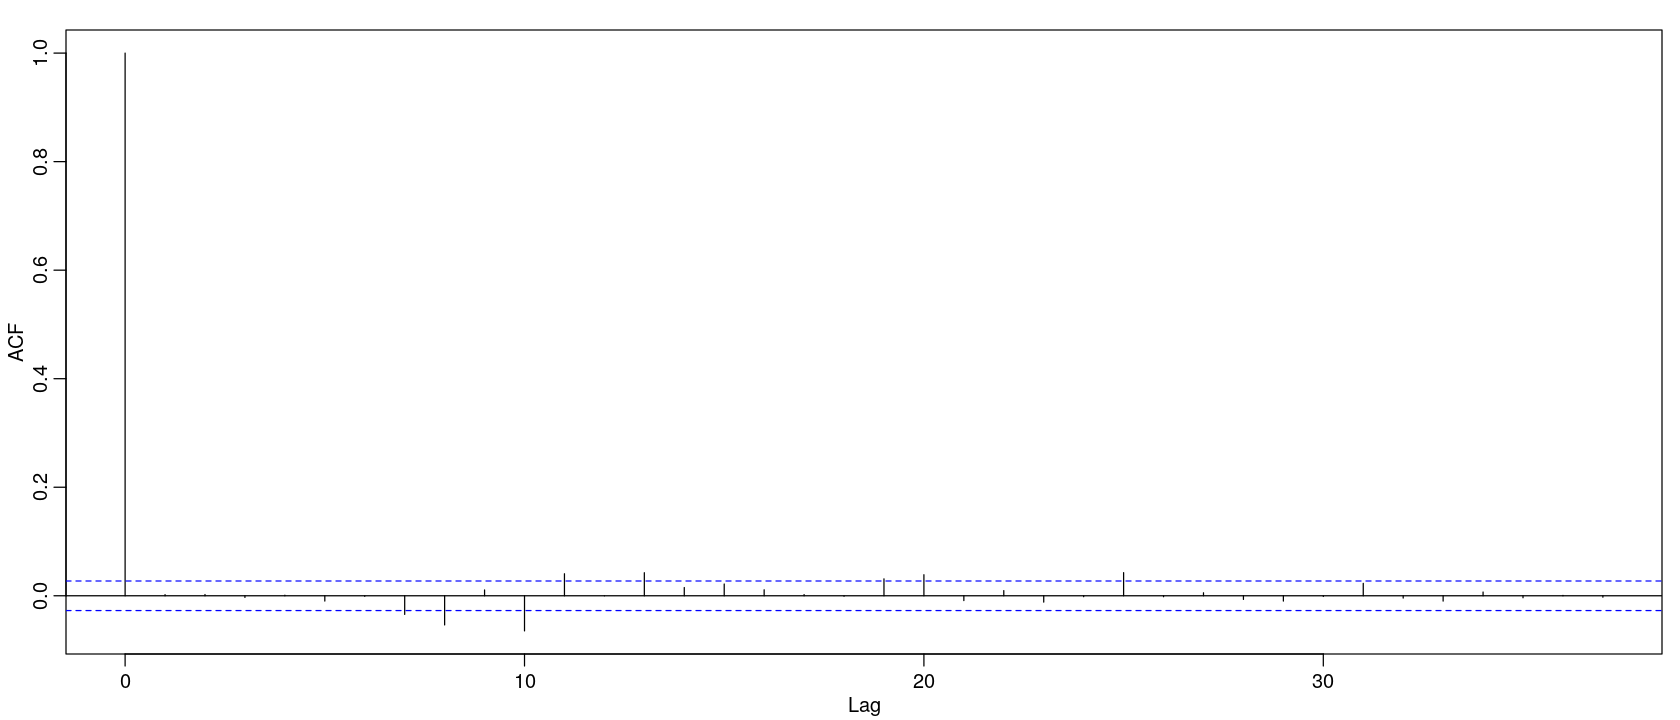

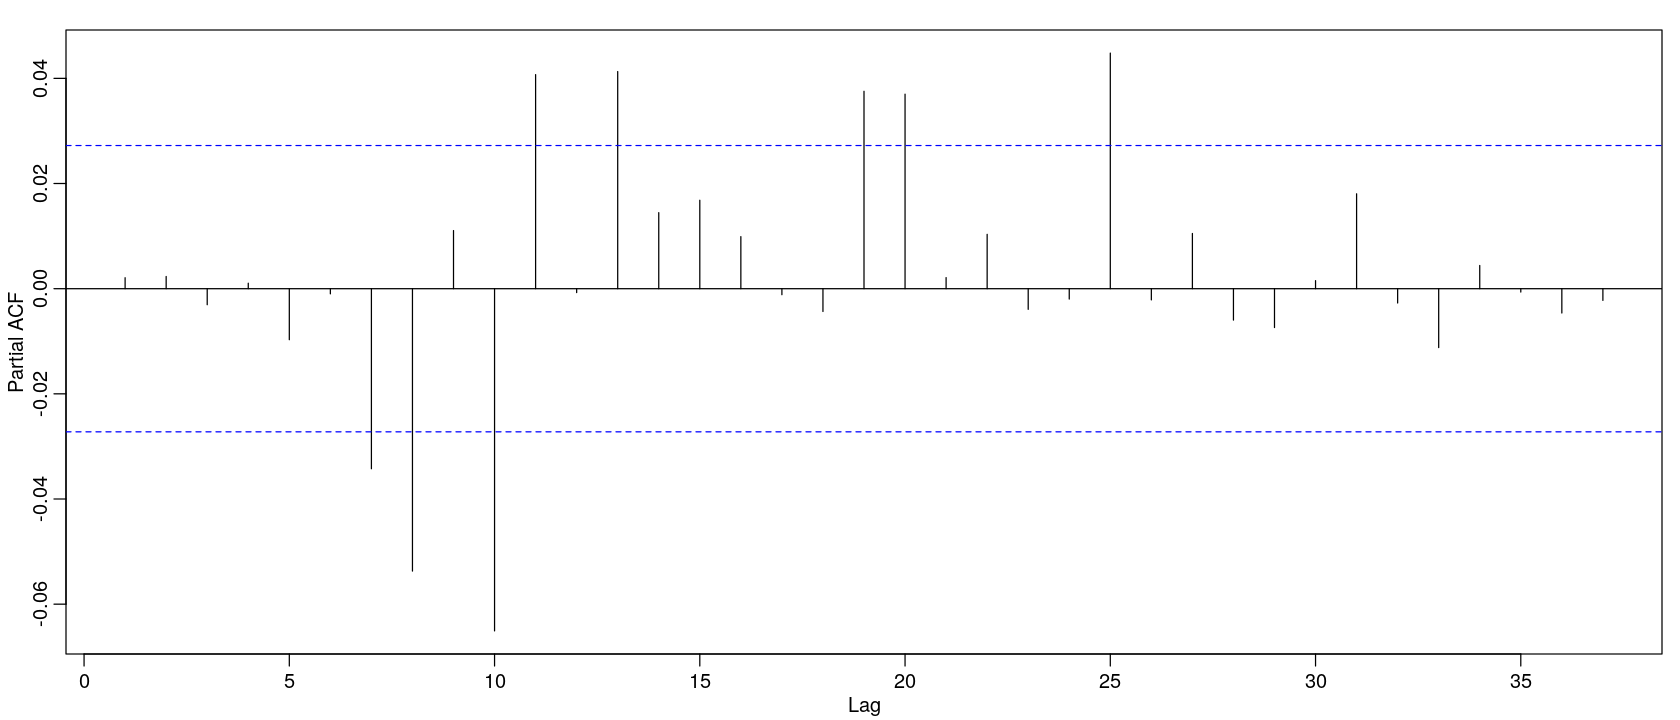

In [40]:
# ARMA SEASONAL (ARIMA(0,0,0)(1,0,0) 6 )
#fit = Arima(ldncr1, order = c(6,0,0), seasonal = list(order = c(1,0,0), period = 24), include.mean=FALSE)
fit = Arima(ldncr1, order = c(6,0,0), seasonal = list(order = c(6,0,0), period = 6), include.mean=FALSE)


fit

resArima = (ts(residuals(fit), start=0, freq=1))
tsplot(resArima, col=4, lwd=2)

acf(resArima)
pacf(resArima)


Series: ldncr1 
ARIMA(6,0,0)(6,0,0)[6] with zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ar6     sar1     sar2    sar3
      0.4555  0.1454  0.0570  0.0644  0.0204  0.1111  -0.1053  -0.0064  0.0453
s.e.  0.0140  0.0153  0.0153  0.0156  0.0152  0.0221   0.0240   0.0160  0.0145
        sar4    sar5   sar6
      0.0450  0.0172  0.044
s.e.  0.0142  0.0141  0.014

sigma^2 estimated as 0.8197:  log likelihood=-6833.56
AIC=13693.12   AICc=13693.19   BIC=13778.31

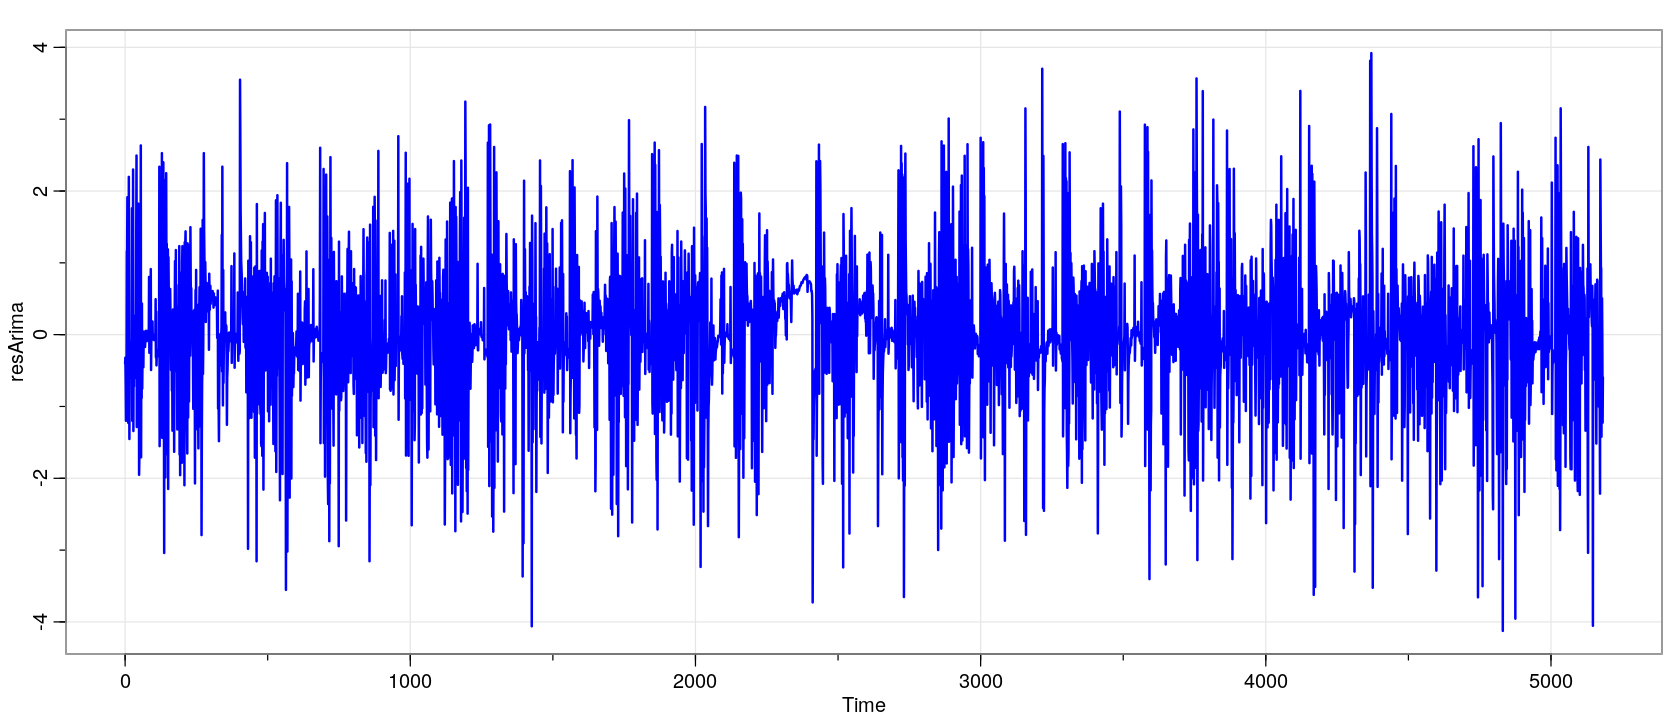

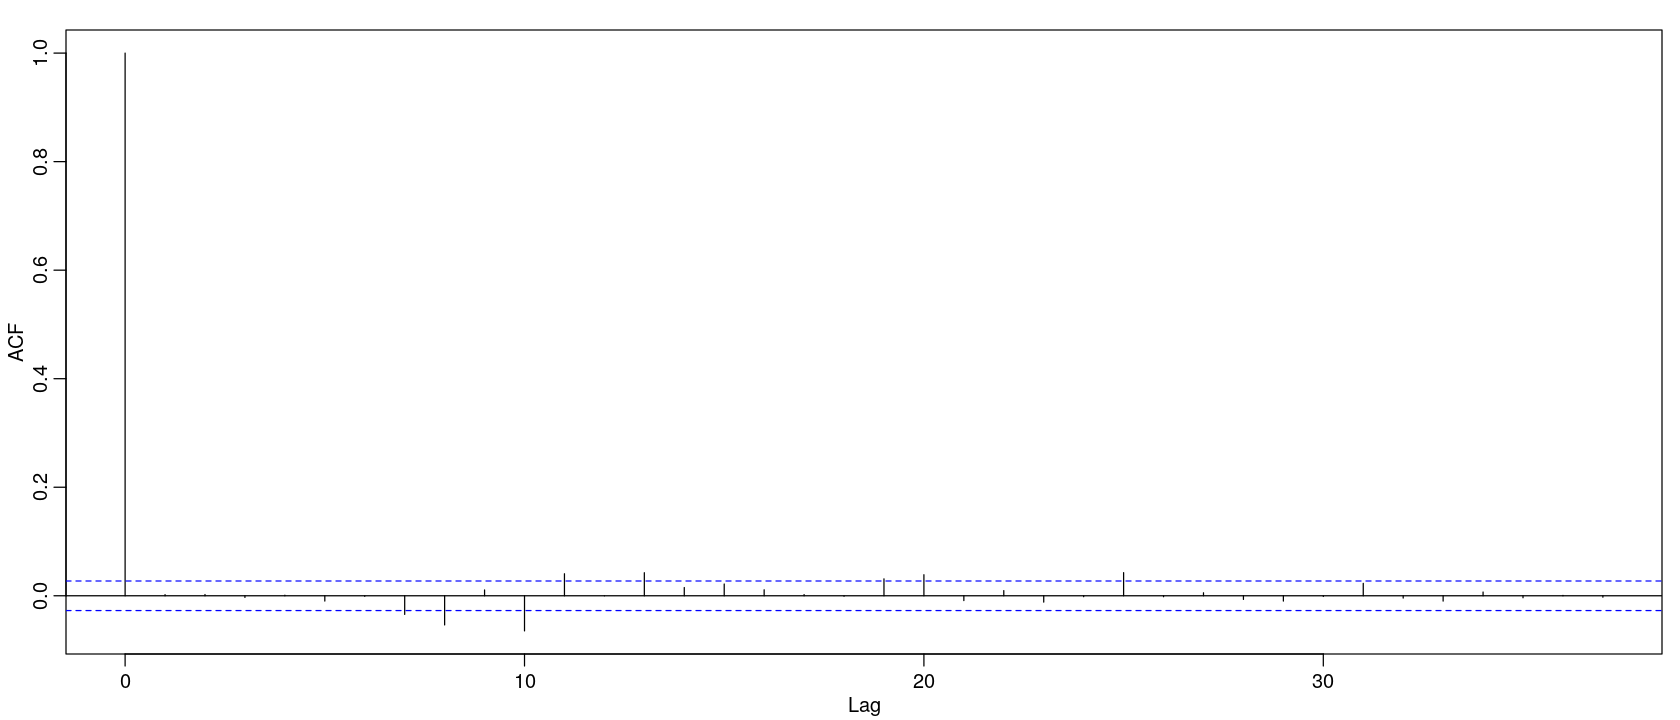

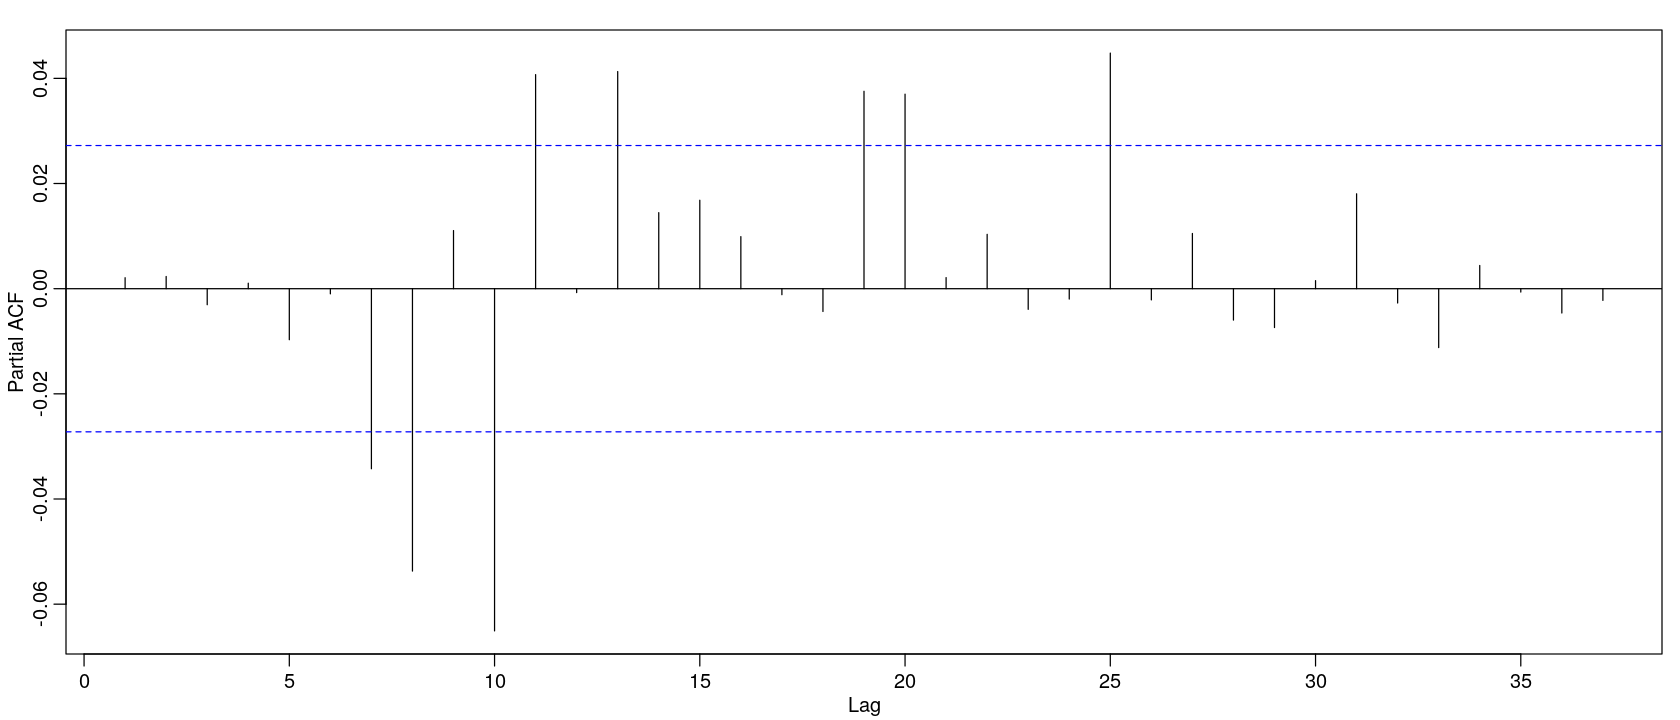

In [41]:
# ARMA SEASONAL (ARIMA(6,0,0)(6,0,0) 6 )

# ajustamos parametros de arma seasonal de acuerdo a 
# https://online.stat.psu.edu/stat510/lesson/4/4.2    y    https://otexts.com/fpp3/seasonal-arima.html

# vemos que después aplicar el periodograma y quitarle las frecuencias periódicas, en el residuo que se obtiene:
# 1- el acf decae similar a una exponencial
# 2- en el pacf vemos 6 picos significativos cada 6 lags

# por esto probamos entre otros un modelo ARIMA(6,0,0)(6,0,0) 6, hasta ahora es el que nos devolvió el AIC mas bajo


fit = Arima(ldncr1, order = c(6,0,0), seasonal = list(order = c(6,0,0), period = 6), include.mean=FALSE)

fit

resArima = (ts(residuals(fit), start=0, freq=1))
tsplot(resArima, col=4, lwd=2)

acf(resArima)
pacf(resArima)


Series: ldncr1 
ARIMA(6,0,6)(5,0,1)[6] with zero mean 

Coefficients:
         ar1     ar2     ar3      ar4     ar5     ar6     ma1     ma2     ma3
      0.2133  0.0353  0.0914  -0.0431  0.1061  0.4972  0.2441  0.2143  0.0965
s.e.  0.0321  0.0229  0.0221   0.0219  0.0239  0.0556  0.0337  0.0299  0.0282
         ma4     ma5     ma6     sar1     sar2     sar3     sar4     sar5
      0.1984  0.0365  0.1939  -0.8841  -0.4581  -0.1880  -0.0556  -0.0256
s.e.  0.0277  0.0287  0.0600   0.3645   0.2193   0.1053   0.0447   0.0188
        sma1
      0.2700
s.e.  0.3678

sigma^2 estimated as 0.8097:  log likelihood=-6798.85
AIC=13635.7   AICc=13635.85   BIC=13760.21

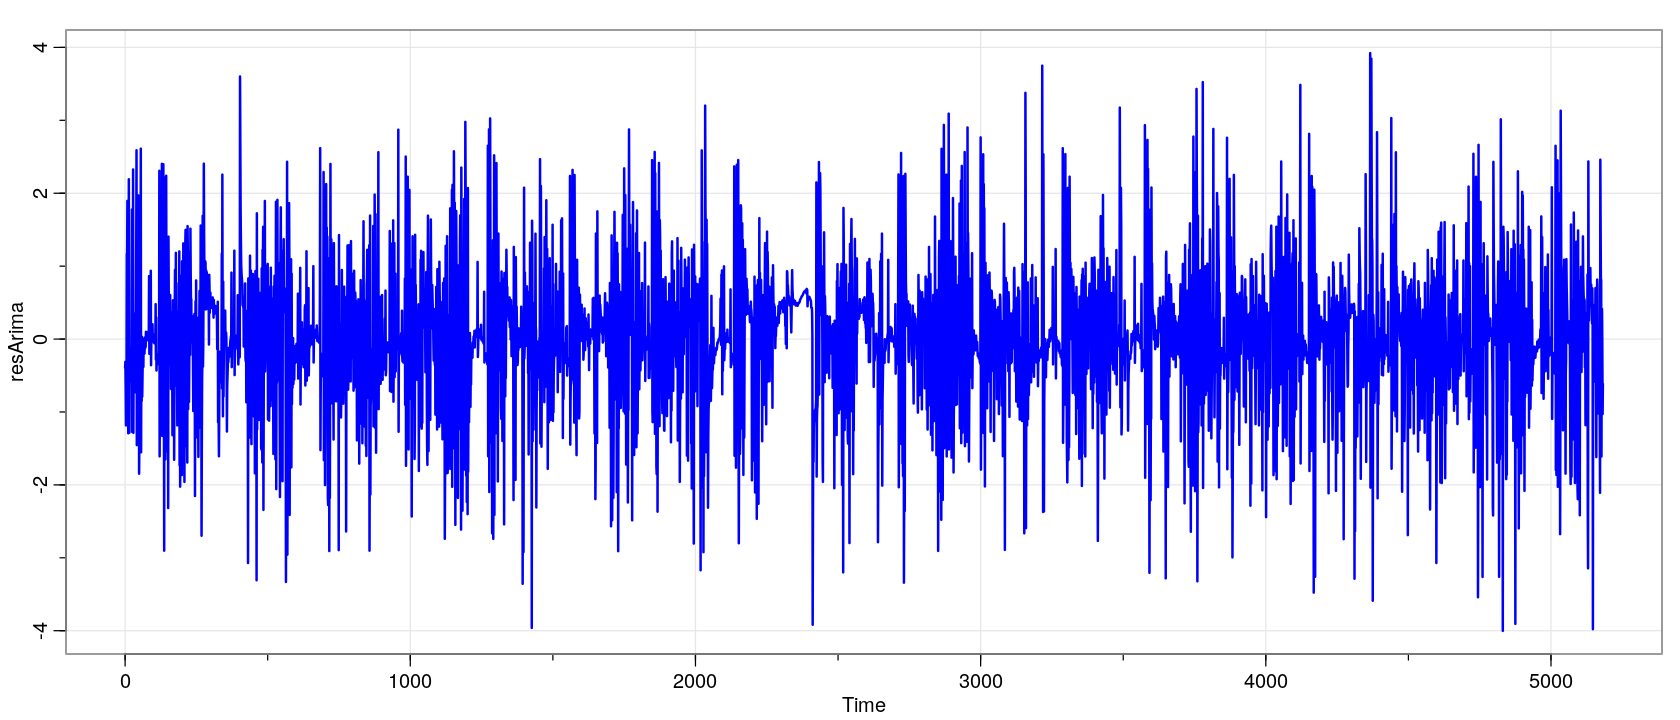

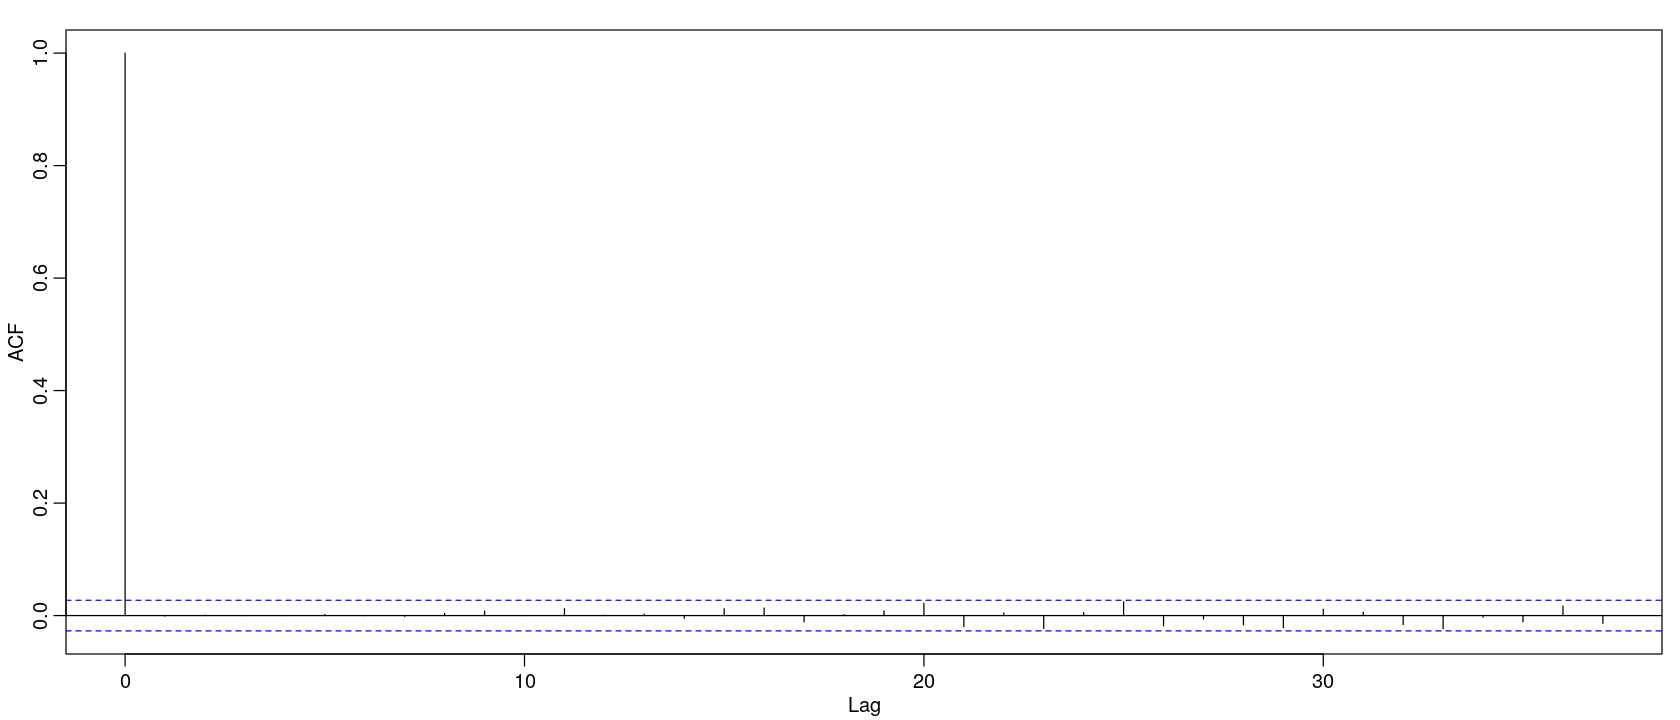

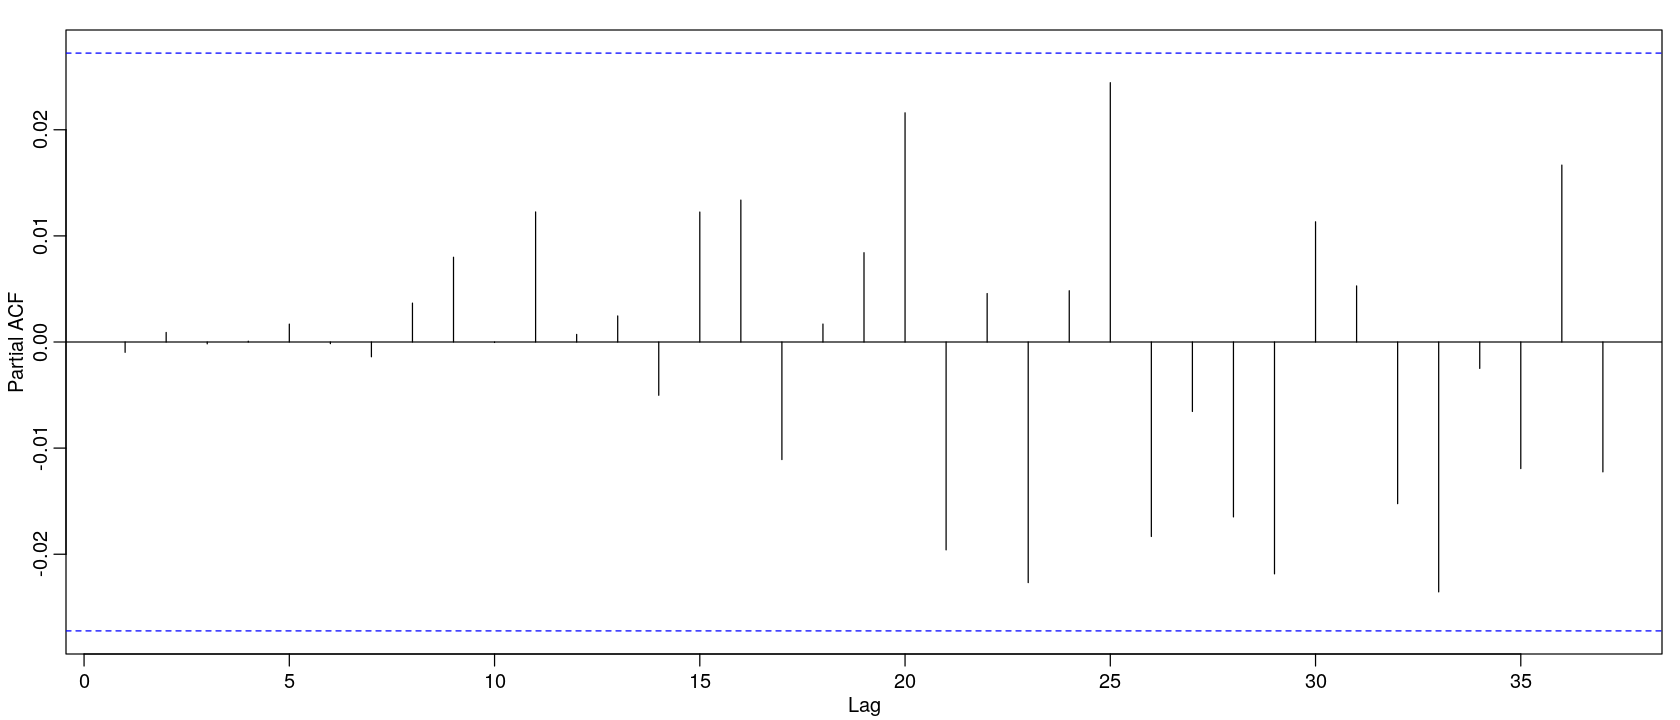

In [42]:
# ARMA SEASONAL (ARIMA(6,0,6)(5,0,1) 6 )
# pruebo con el mejor AIC que conseguí en el grid search
fit = Arima(ldncr1, order = c(6,0,6), seasonal = list(order = c(5,0,1), period = 6), include.mean=FALSE)

fit

resArima = (ts(residuals(fit), start=0, freq=1))
tsplot(resArima, col=4, lwd=2)

acf(resArima)
pacf(resArima)

Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”


Series: ldncr1 
ARIMA(6,0,6)(5,0,1)[6] with zero mean 
Box Cox transformation: lambda= 0.975766 

Coefficients:
         ar1     ar2     ar3      ar4     ar5     ar6     ma1     ma2     ma3
      0.1998  0.0363  0.0915  -0.0321  0.0996  0.5660  0.2627  0.2273  0.1092
s.e.  0.0275  0.0201  0.0198   0.0192  0.0216  0.0445  0.0295  0.0263  0.0255
         ma4     ma5     ma6     sar1     sar2     sar3     sar4     sar5
      0.2002  0.0499  0.1786  -0.7480  -0.4142  -0.1948  -0.0772  -0.0415
s.e.  0.0241  0.0264  0.0550   0.2887   0.1827   0.0965   0.0447   0.0188
        sma1
      0.0926
s.e.  0.2913

sigma^2 estimated as 0.8336:  log likelihood=-6874.73
AIC=13787.46   AICc=13787.61   BIC=13911.97

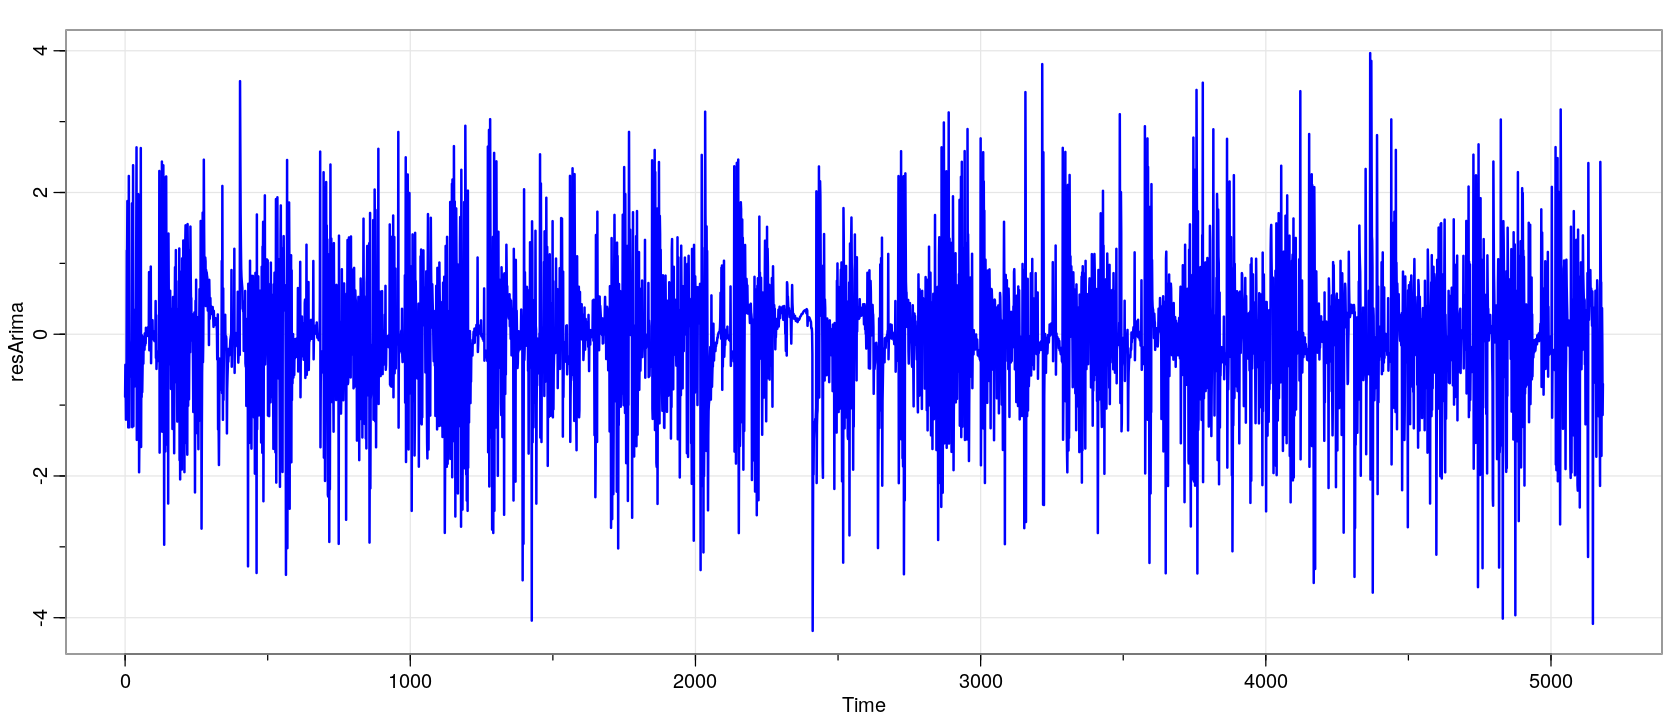

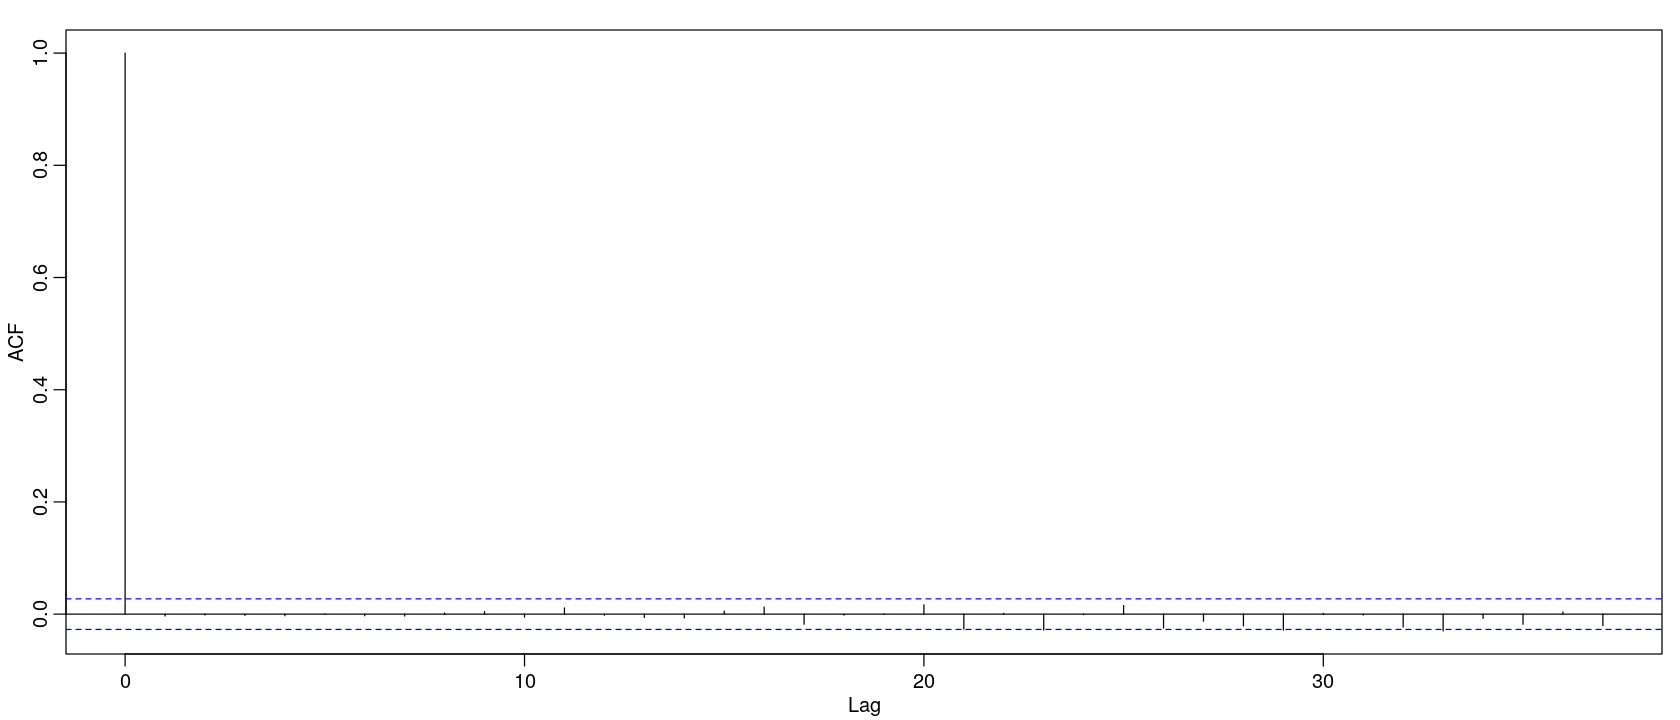

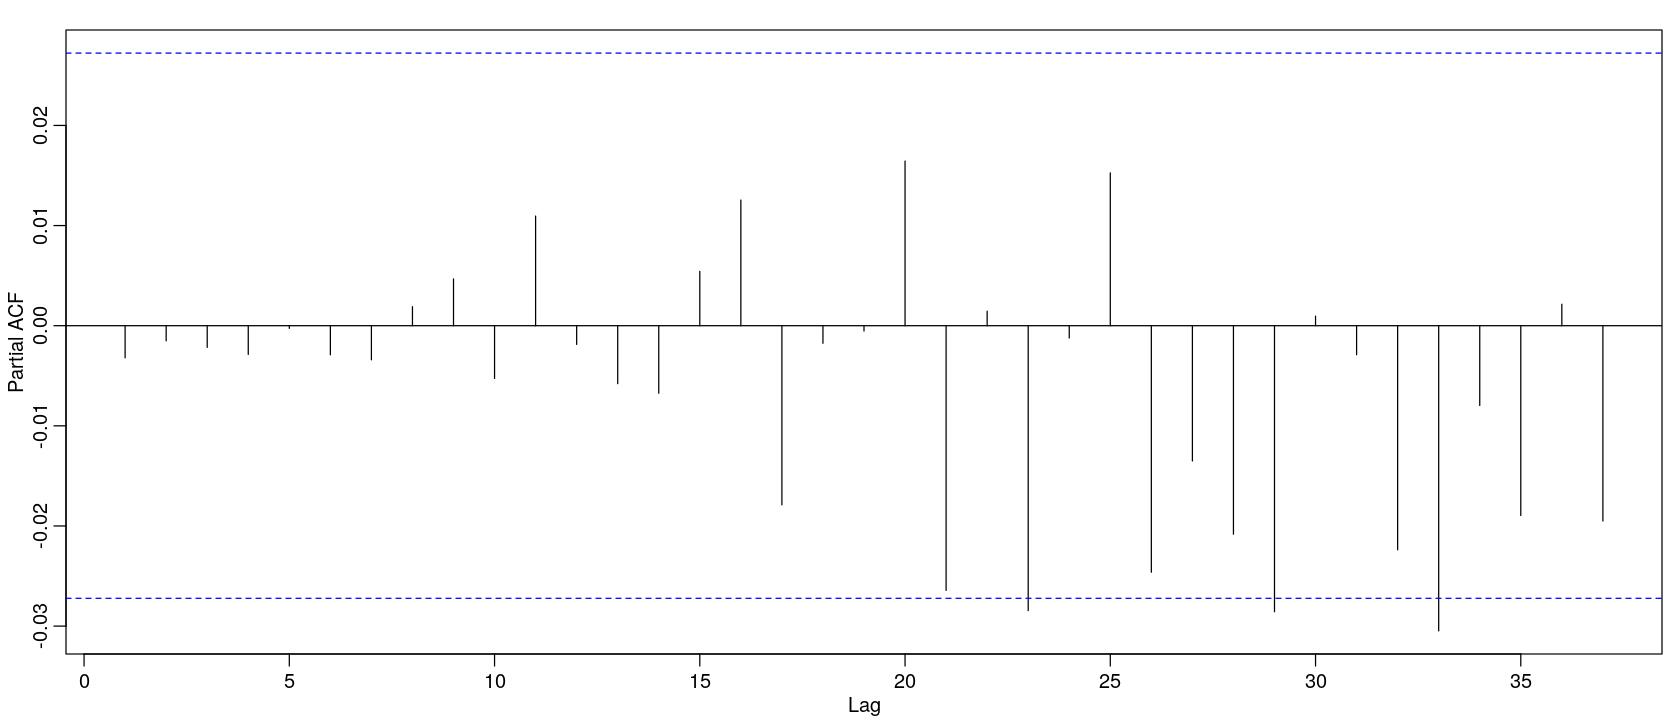

In [43]:


lambda <- BoxCox.lambda(ldncr1,lower=0)


# ARMA SEASONAL (ARIMA(6,0,6)(5,0,1) 6 )
# pruebo con el mejor AIC que conseguí en el grid search

fit = Arima(ldncr1, order = c(6,0,6), seasonal = list(order = c(5,0,1), period = 6), include.mean=FALSE, lambda=lambda)


fit

resArima = (ts(residuals(fit), start=0, freq=1))
tsplot(resArima, col=4, lwd=2)

acf(resArima)
pacf(resArima)

In [ ]:
# otras pruebas

In [ ]:
fore = predict(fit, n.ahead=1)

fore

In [ ]:
predict_trend

In [ ]:
e = exp(1)

In [ ]:
f_fore = e^(fore$pred + fore_f + predict_trend)

In [ ]:
f_fore

In [ ]:
exp(ldnt[1])
time(ldnt[1])

In [ ]:
ts.plot(exp(ldnt), f_fore, col=c(4,2), lwd=2, xlim=c(5184,5190), ylim=c(0,20), ylab="Slots BQ")

#Construyo un intervalo de confianza
#U = fore$pred+fore$se; L = fore$pred-fore$se
#xx = c(time(U), rev(time(U))); yy = c(L, rev(U))

#polygon(xx, yy, border = 2, col = gray(.6, alpha = .2))
lines(f_fore, type="p", col=2, lwd=2)

In [ ]:
tt = time(ldnt)

In [ ]:
fitt = lm(ldnt ~ tt, na.action=NULL)
summary(fitt)

num = length(ldnt)

tsplot(ldnt, ylab="", main="Slots BQ", col=4, lwd=2)
predictiont = ts(fitted(fitt), start=start_test, freq=1)
lines(predictiont, col=2, lwd=4)

ldnt = as.numeric(ldnt)
ldntc = ldnt-predictiont

tsplot(ldntc, ylab="", main="Slots BQ", col=4, lwd=2)

In [ ]:
e = exp(1)

ldnt = ts(ldnt, start=start_test, frequency=1)

v_ldnt = ldnt #c + predictiont
v_pred = fore$pred + predictiont

v_ldnt = e^v_ldnt
v_pred = e^v_pred


ts.plot(v_ldnt, v_pred, col=c(4,2), lwd=2, xlim=c(5184,5300), ylab="Slots BQ", ylim=c(0,15))

In [ ]:
time(v_pred)

In [ ]:
v_ldnt[0:20]

In [ ]:
v_pred[0:20]

In [ ]:
time(v_ldnt)

In [ ]:
v_pred

In [ ]:
ts.plot(ldnc, col=c(4), lwd=2, xlim=c(5184,5428), ylab="Slots BQ")

In [ ]:
fore$pred

In [ ]:
ldntc[0:10]

In [ ]:
time(fore$pred)

In [ ]:
time(ldntc)[0:10]

In [ ]:
# 1.384 pred
# 

In [ ]:
2.718^1.286

In [ ]:
2.718^3.899